In [1]:
# Import packages


import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


import sys
sys.path.insert(0, '/home/ec2-user/SageMaker/mymodule/')
from common_functions import psi
from common_functions import ks
from common_functions import data_vars
from impute_functions import impute_secure
from impute_functions import impute_unsecure
from impute_functions import impute_noappl
from impute_functions import setMax

# pd.set_option('mode.chained_assignment', None)
# pd.reset_option('mode.chained_assignment')
import _pickle as cpickle 

import boto3


In [2]:


#old s3_source_path='s3://mf-ml-ds/propensity_to_pay/Monthly_Validation/val_202009/'
YYYYMM = '202012'
bucket_name = 'mf-ml-ds'
s3_source = 's3://'+ bucket_name +'/propensity_to_pay/Monthly_Validation/val_'
s3_source_path  = s3_source + YYYYMM
s3_score_target  = 'propensity_to_pay/Monthly_Validation/val_' + YYYYMM +'/'
# pps_score_file_name = 'xgb_weighted_score_pot_' + YYYYMM +'.csv'

psi_file_path = 's3://'+ bucket_name + '/' + s3_score_target
model_path = 'propensity_to_pay/final_model/'

s3 = boto3.resource('s3')



In [3]:
def download_model(model_name):
    #model_name = 'slowsecure_xgb_model_w'
    s3.meta.client.download_file(bucket_name, model_path + model_name, model_name)
    with open(model_name, 'rb') as f:
        xgb = cpickle.load(f)
        return xgb
    

In [4]:
def upload_file(df_file, file_name):
    #psi_file_name = 'pot30_xgb_psi.xlsx'
    df_file.to_excel(file_name)
    s3.meta.client.upload_file(file_name, bucket_name , s3_score_target + file_name)

In [5]:
df_columns = pd.read_csv('pps_attributes.csv')

In [6]:
slowsecure_columns = df_columns[ df_columns['segment'] == 'slowsecure']['columns_name'].to_list()
slowunsecure_columns = df_columns[ df_columns['segment'] == 'slowunsecure']['columns_name'].to_list()
slownoappl_columns = df_columns[ df_columns['segment'] == 'slownoappl']['columns_name'].to_list()

In [5]:
#read in the csv oot  data
df=pd.read_csv(s3_source_path+'/secure.csv')

In [7]:
df1=df[slowsecure_columns]
df1.shape

(62354, 40)

In [8]:
#read in the csv oot  data
df=pd.read_csv(s3_source_path+'/unsecure.csv')

In [9]:

df2=df[slowunsecure_columns]
df2.shape

(330891, 39)

In [10]:
#read in the csv oot  data
df=pd.read_csv(s3_source_path+'/noappl.csv')


In [11]:

df3=df[slownoappl_columns]
df3.shape

(147711, 38)

# plot the slowsecure and compare with the development sample

In [12]:
import scorecardpy as sc
from matplotlib import rcParams

# rcParams['figure.figsize'] = 6.4 ,4.8
bins_adj = sc.woebin(df1, y="badflag")


[INFO] creating woe binning ...
Binning on 62354 rows and 40 columns in 00:00:16


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figu

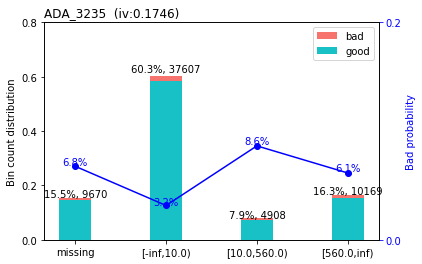

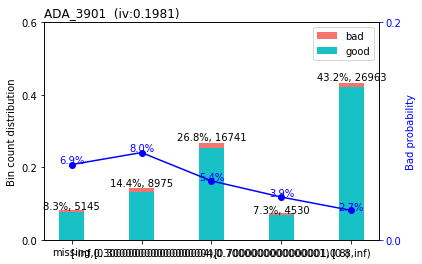

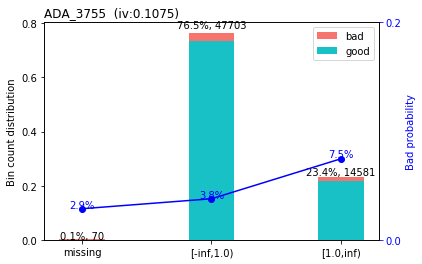

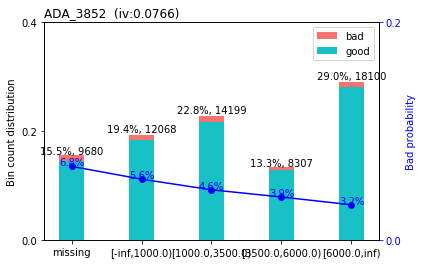

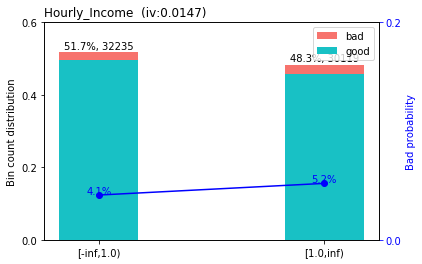

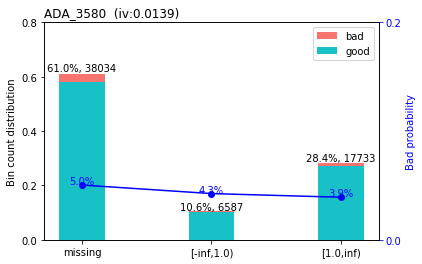

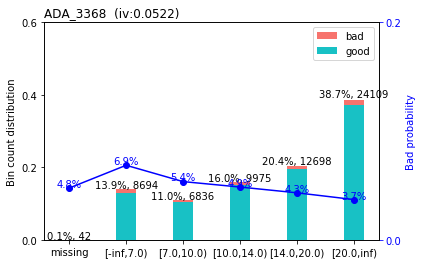

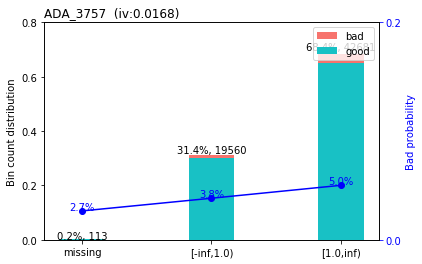

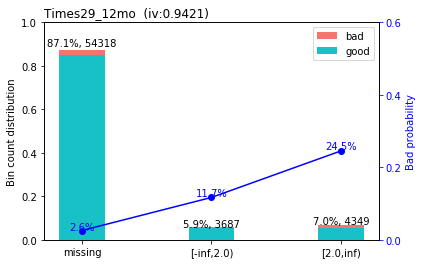

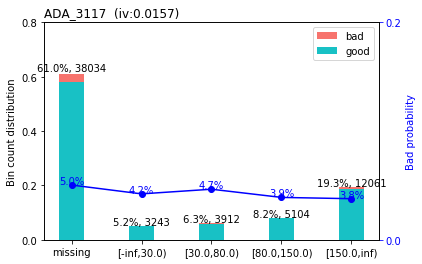

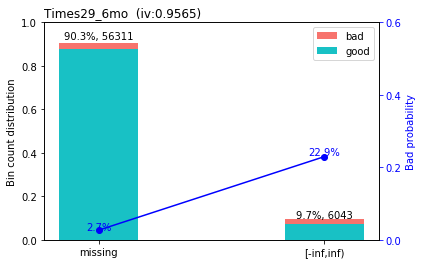

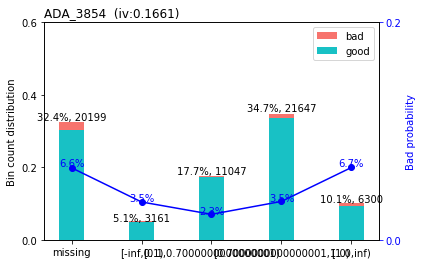

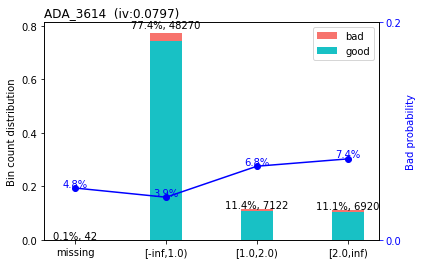

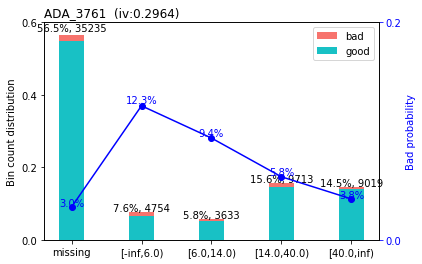

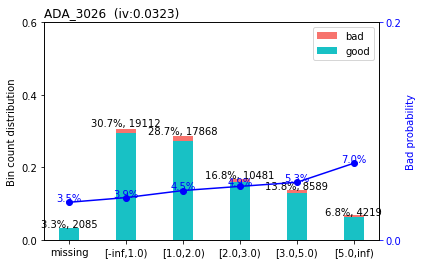

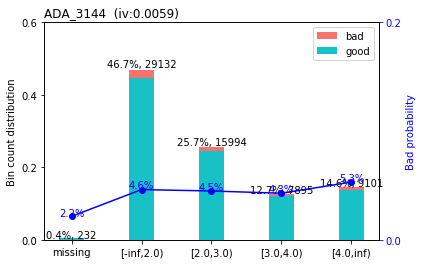

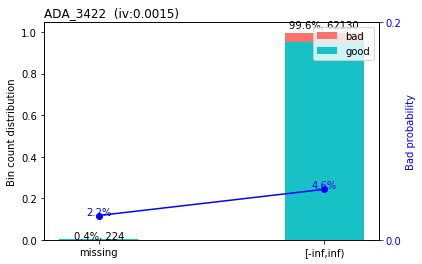

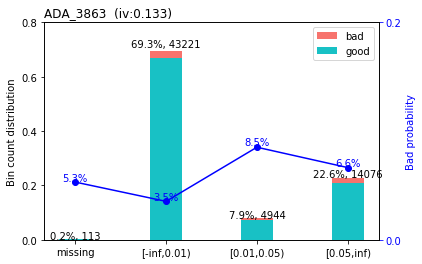

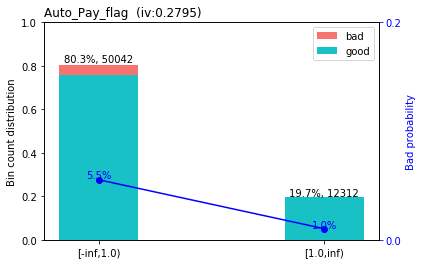

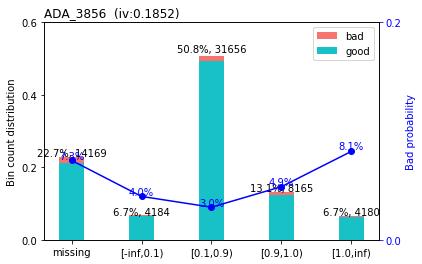

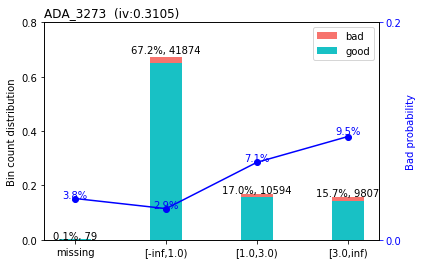

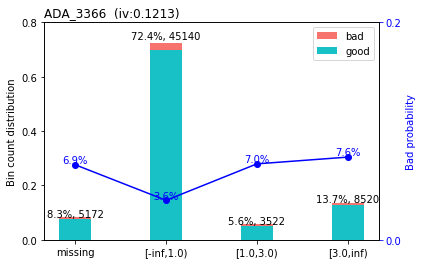

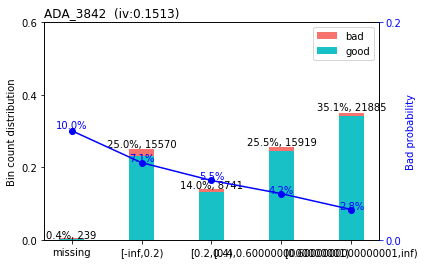

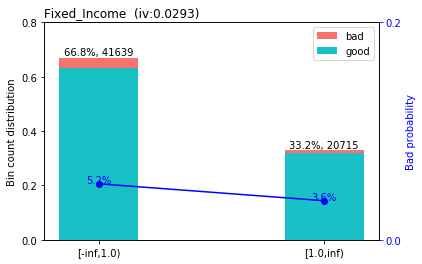

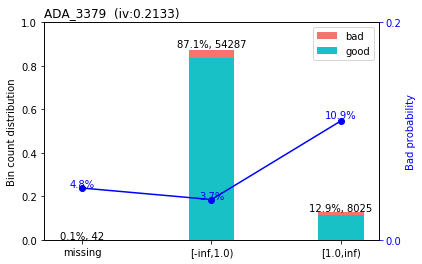

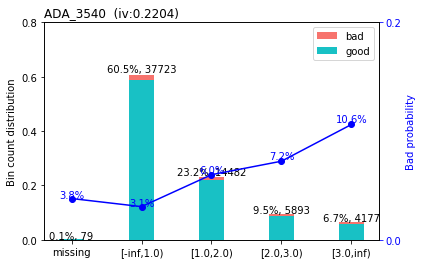

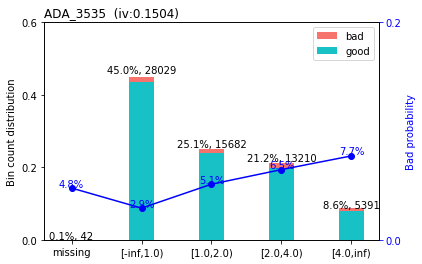

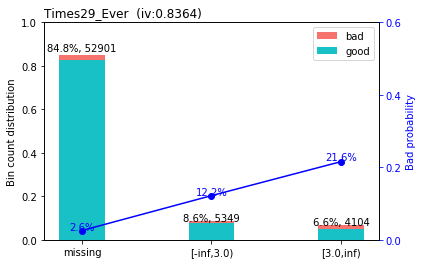

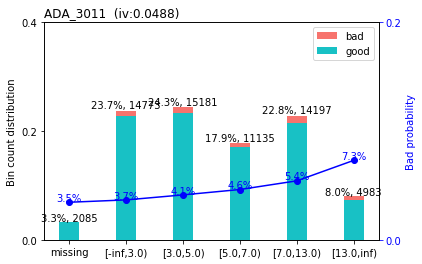

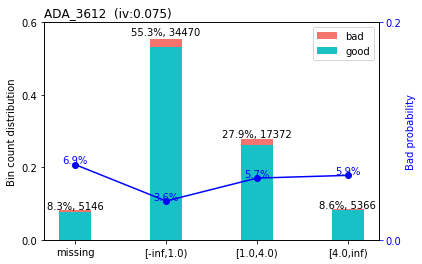

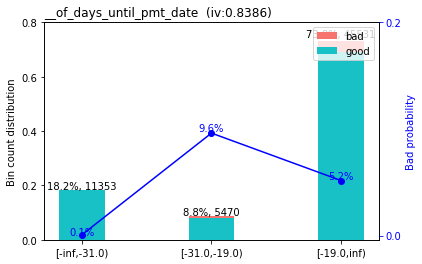

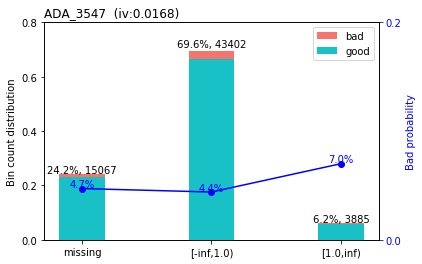

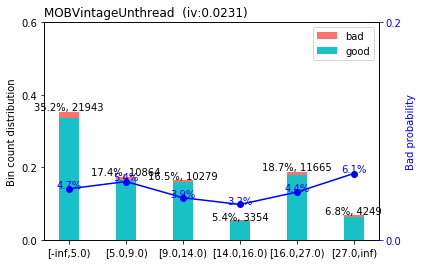

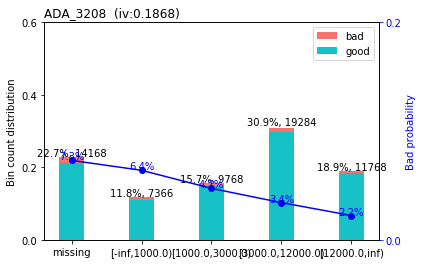

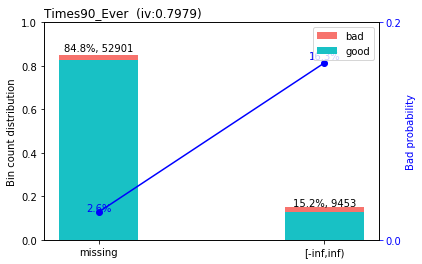

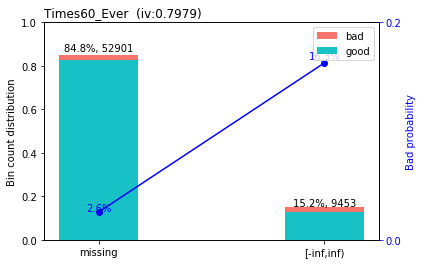

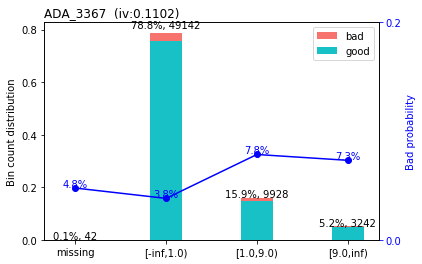

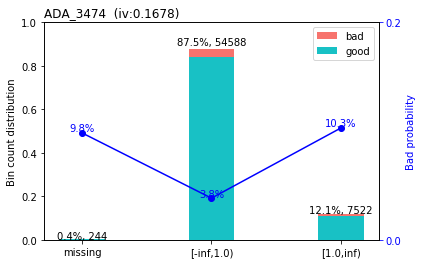

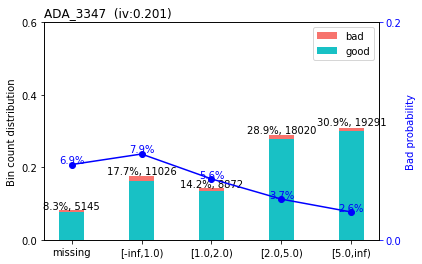

In [13]:
plotlist=sc.woebin_plot(bins_adj)

In [14]:
for key,i in plotlist.items():
#     plt.show(i)
    i.savefig('/home/ec2-user/SageMaker/propensity_to_pay/model_monitor/slowsecure_char/'+str(key)+'.png')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


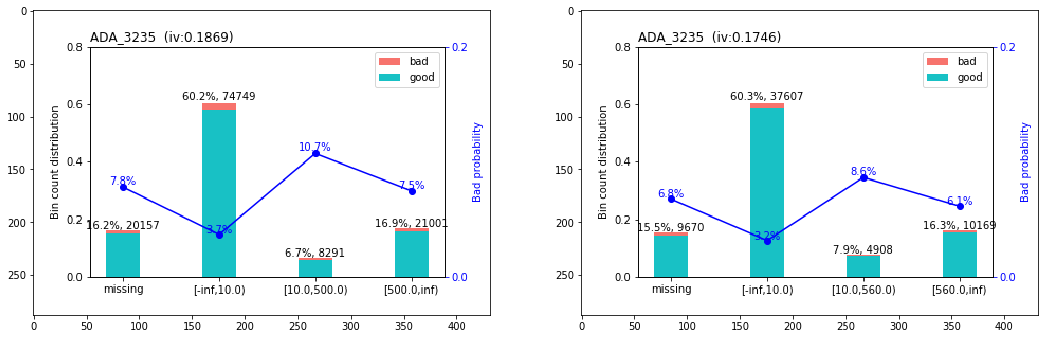

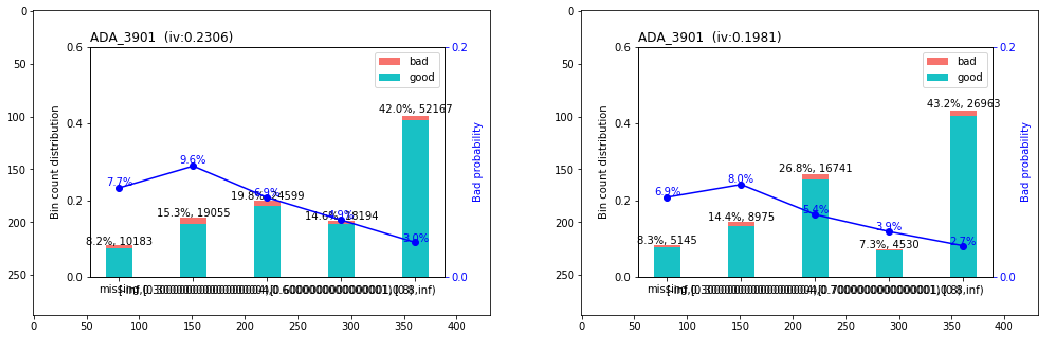

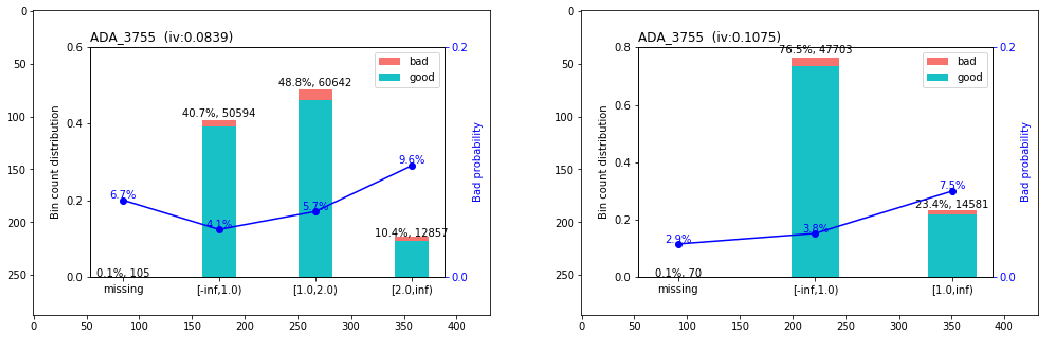

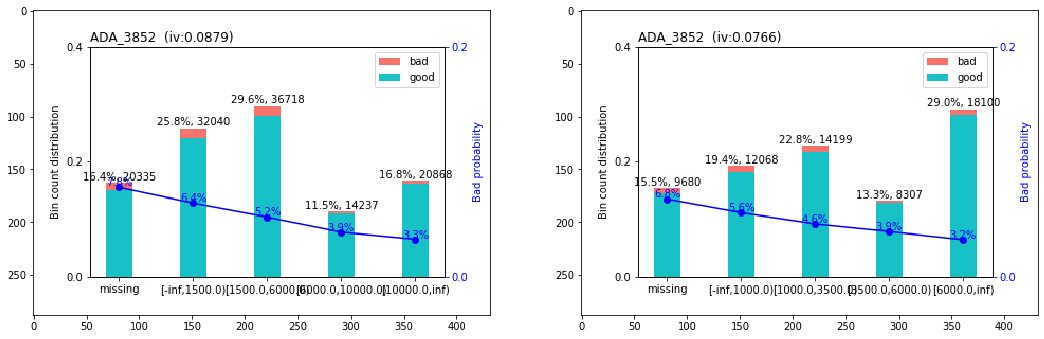

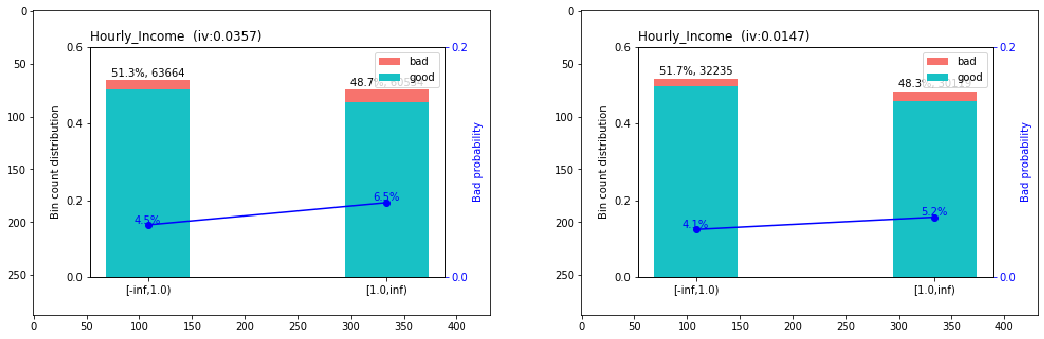

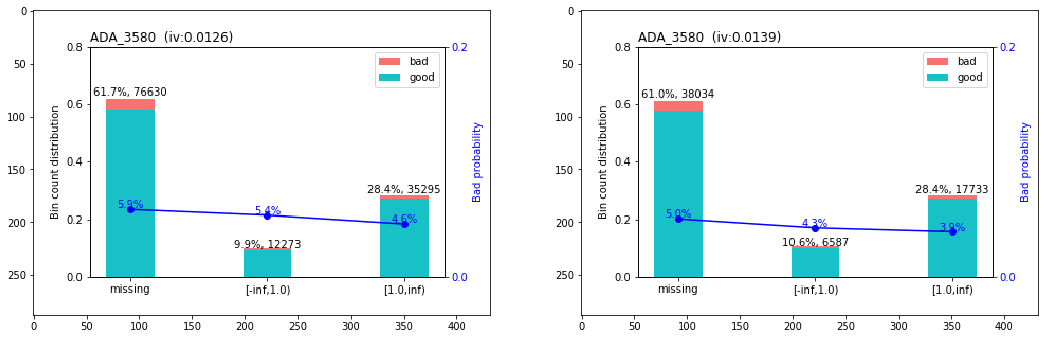

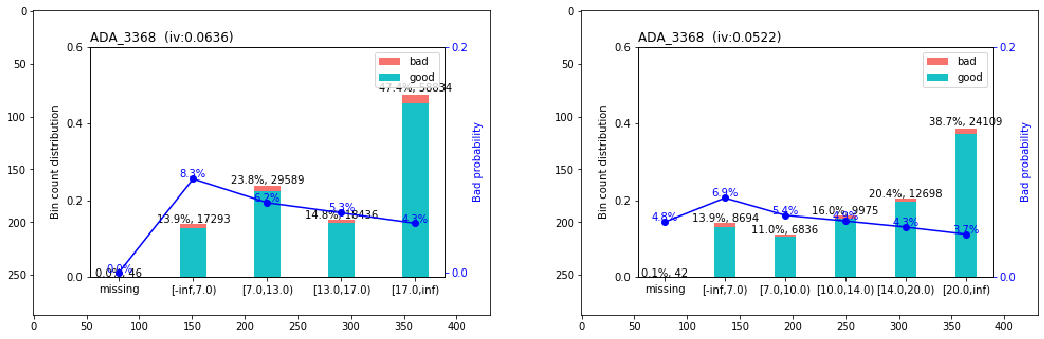

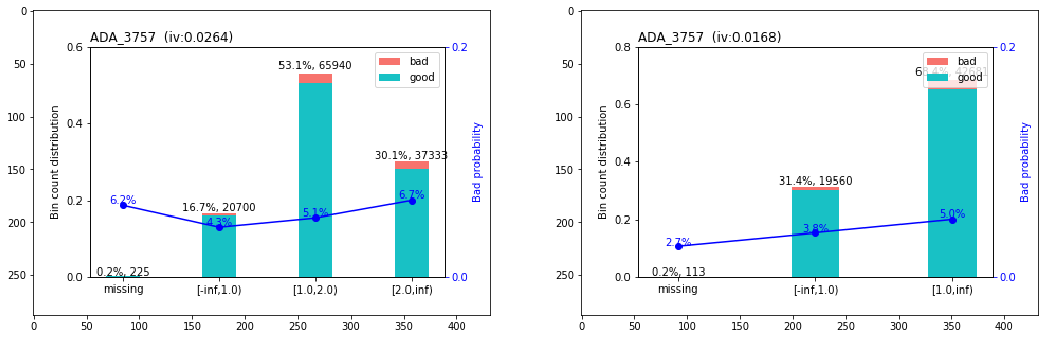

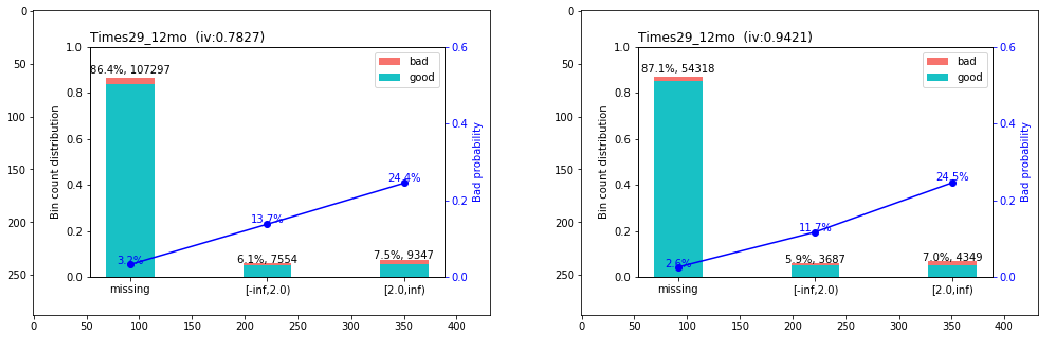

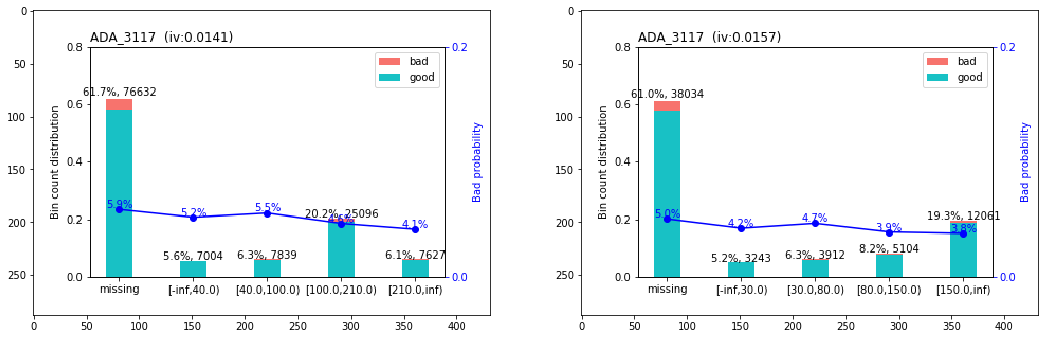

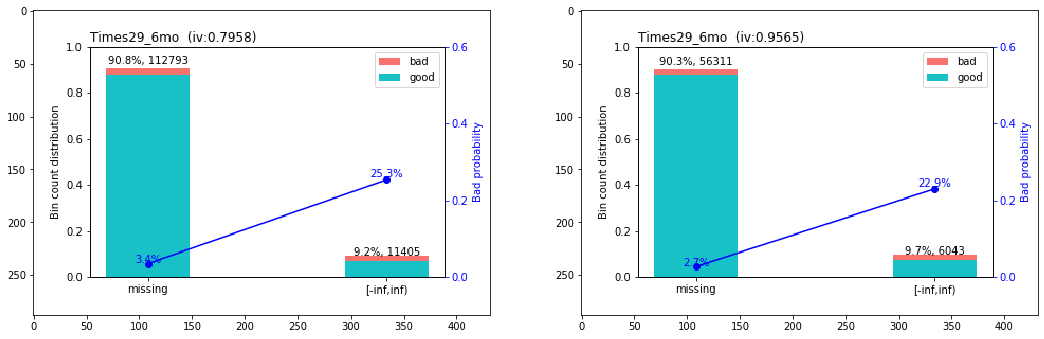

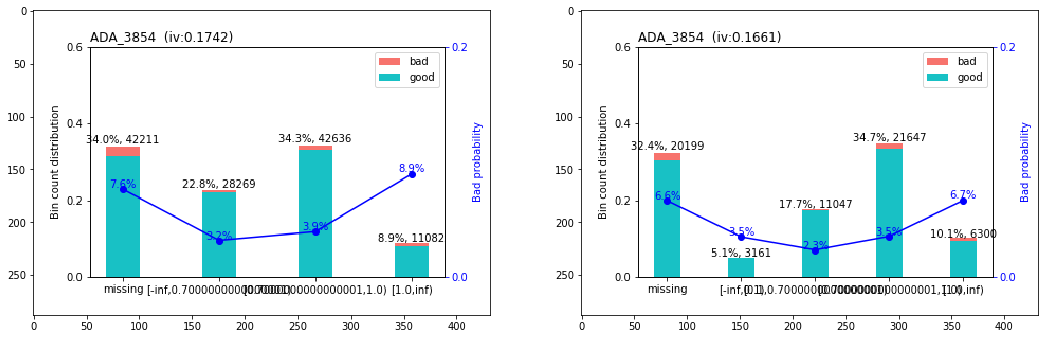

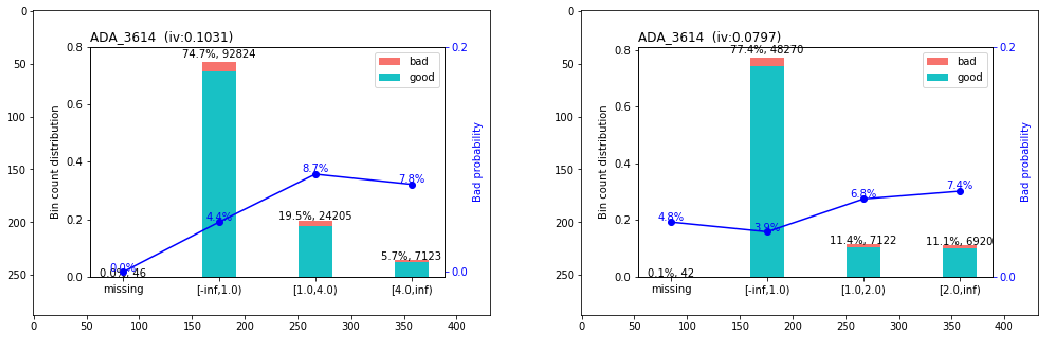

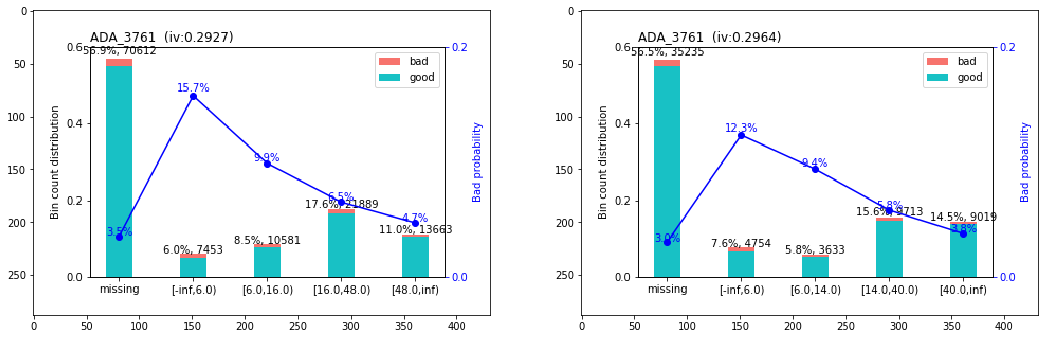

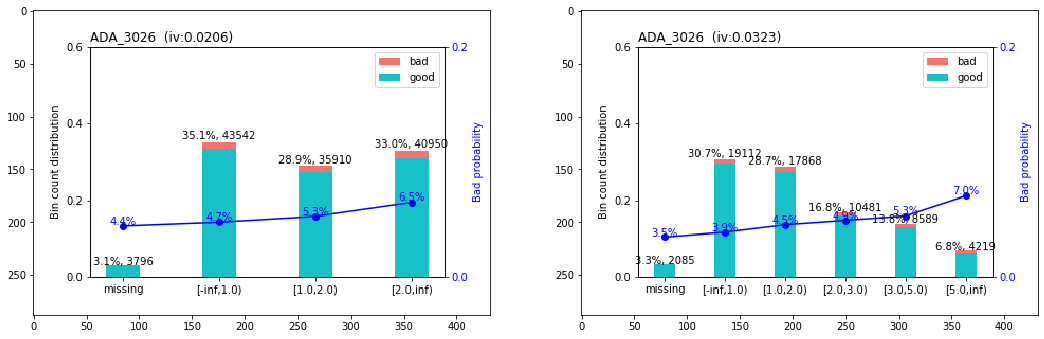

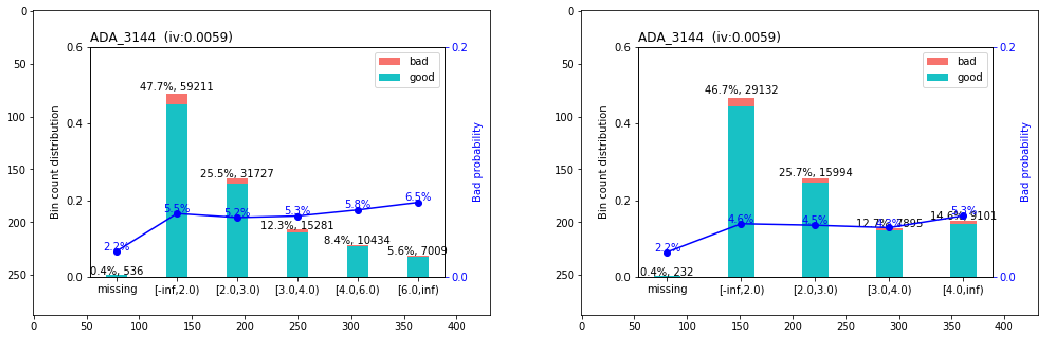

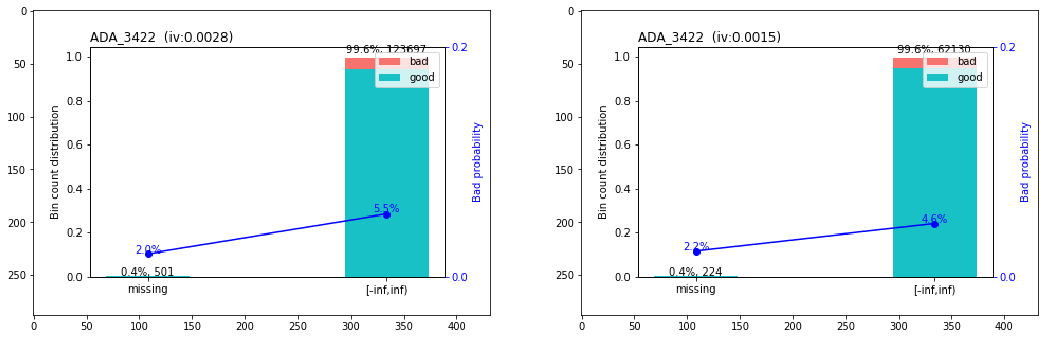

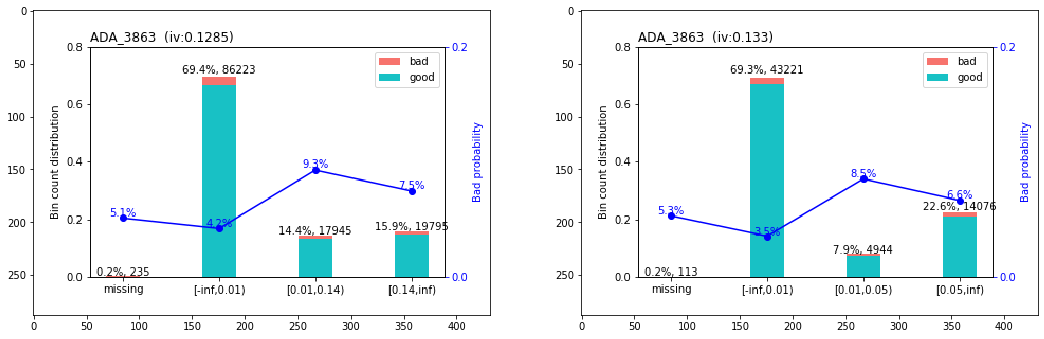

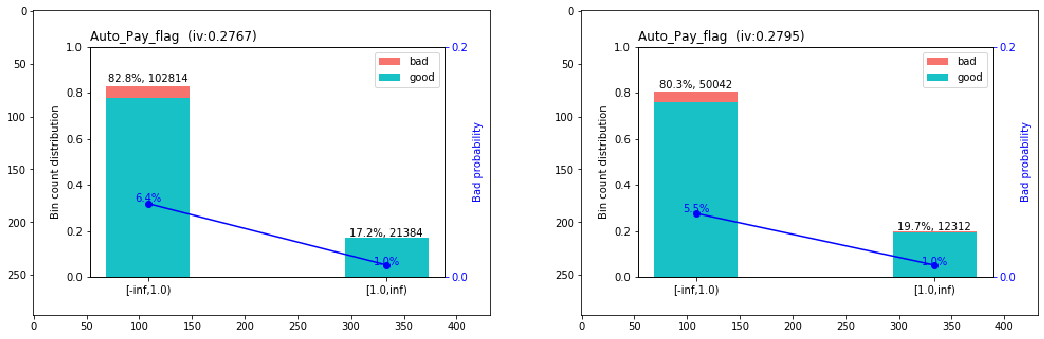

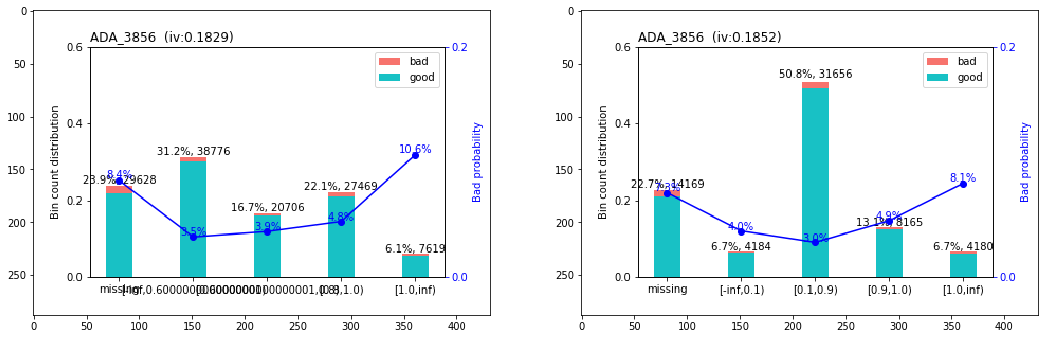

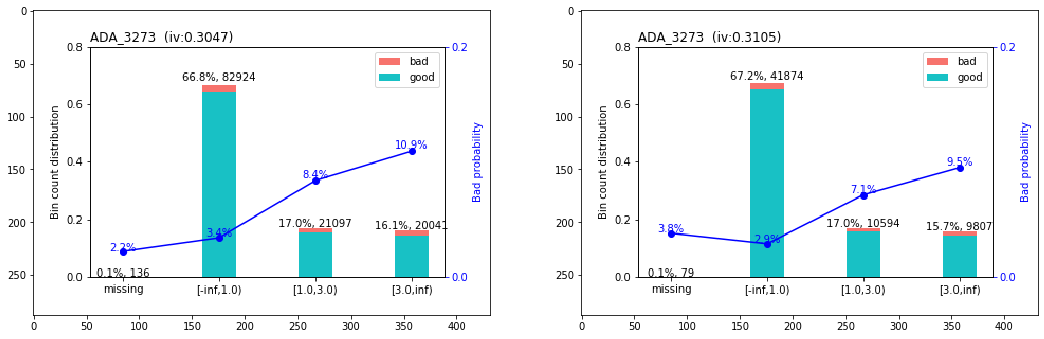

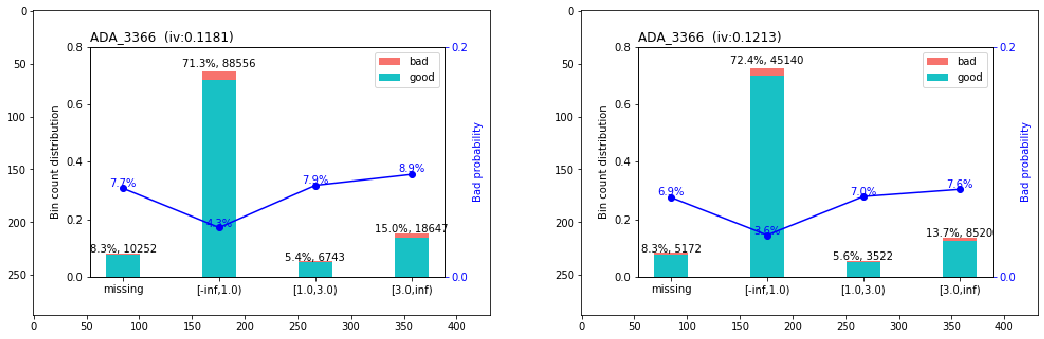

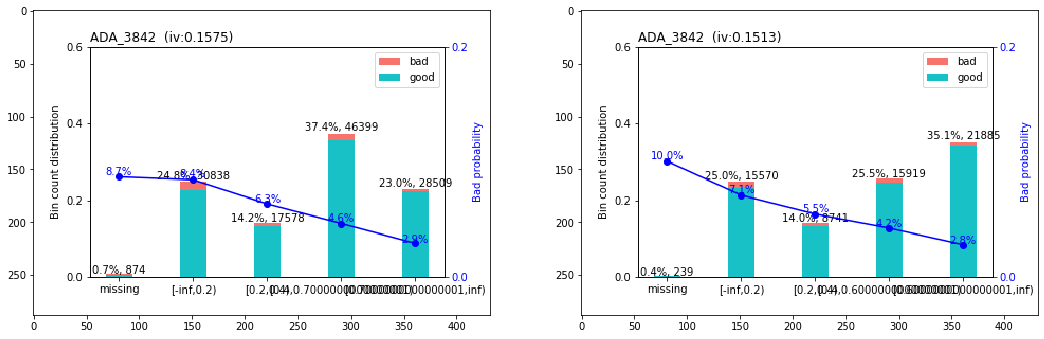

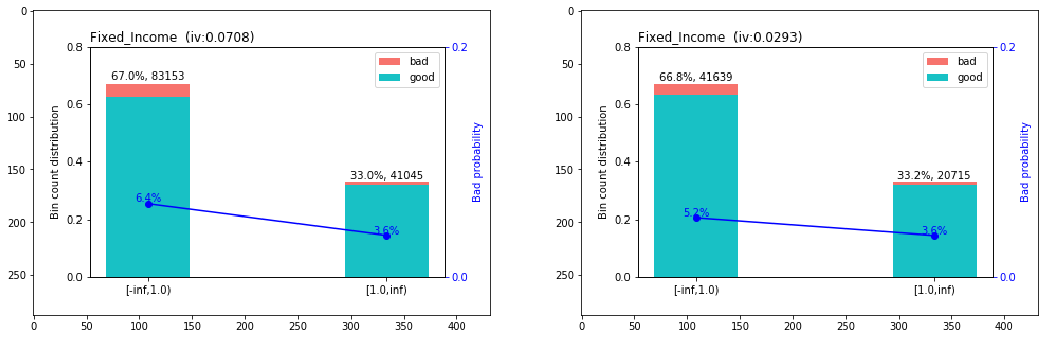

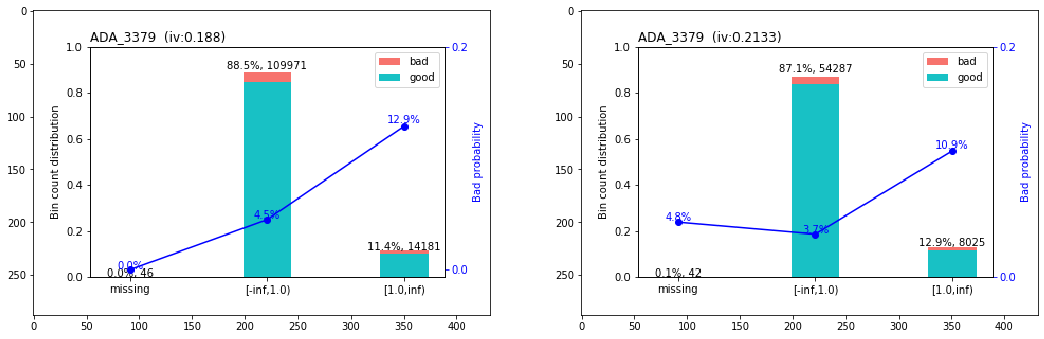

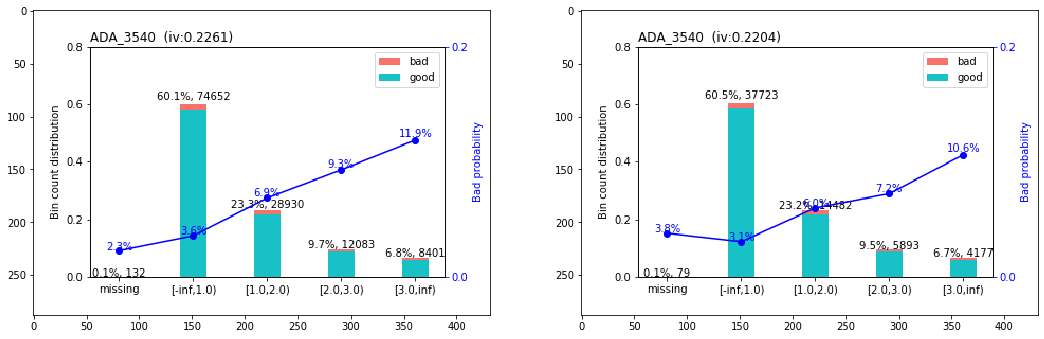

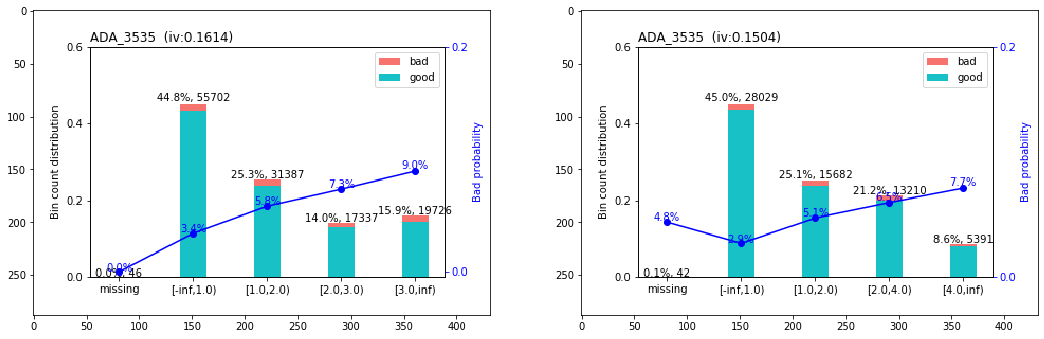

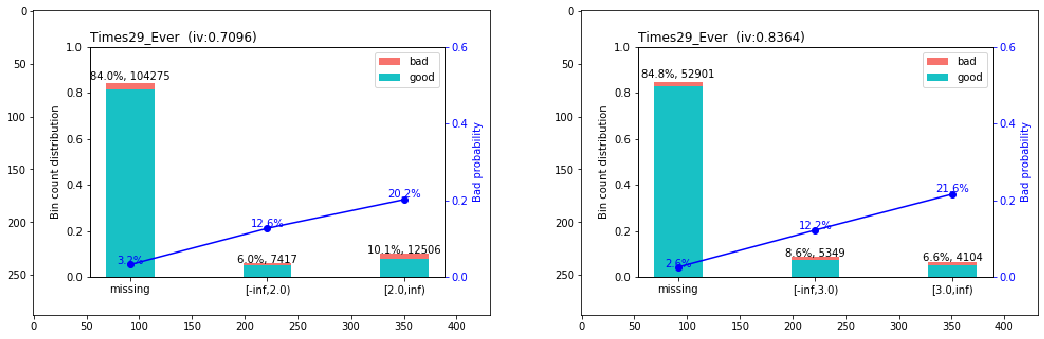

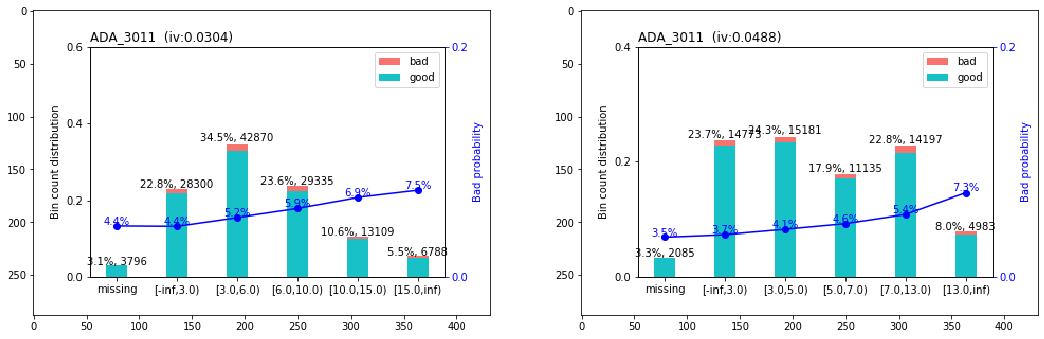

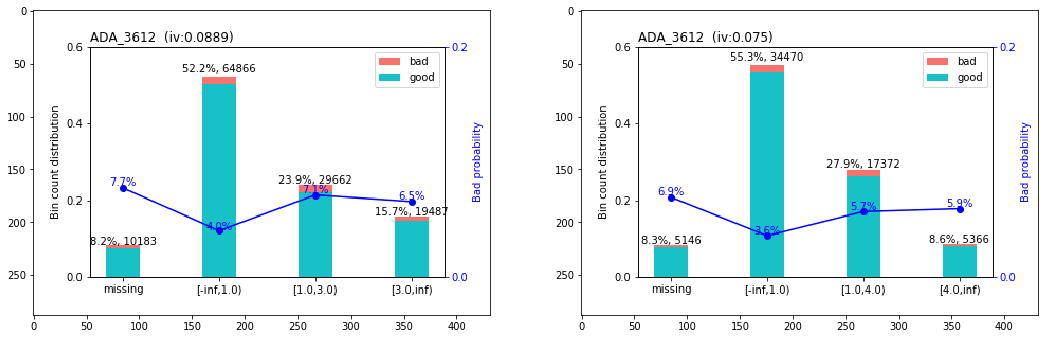

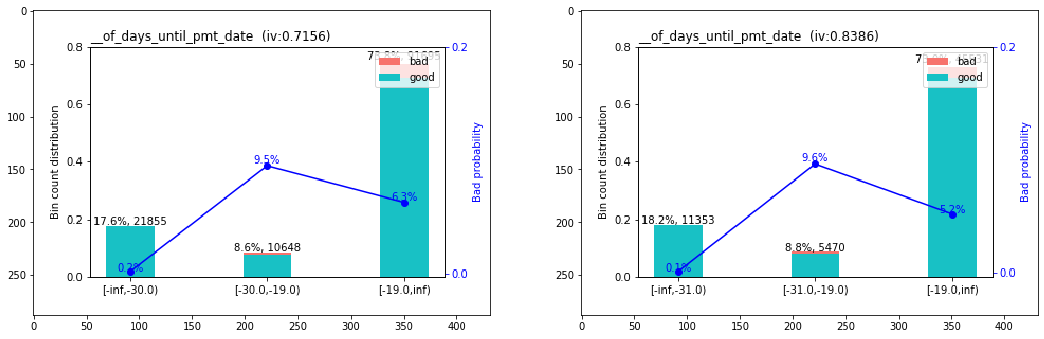

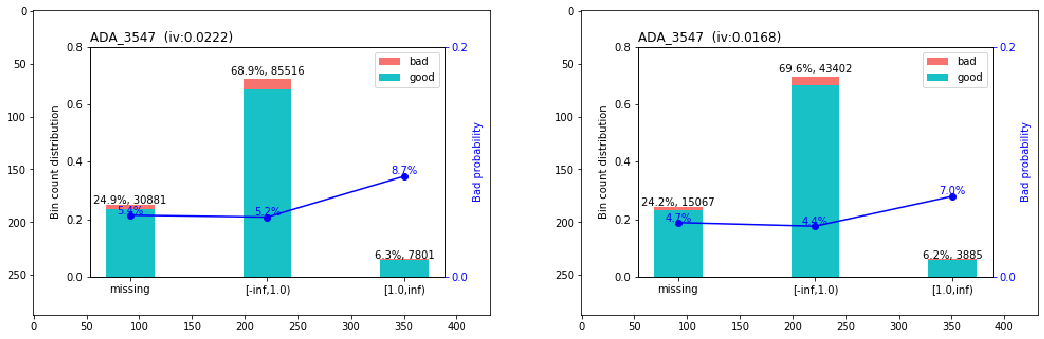

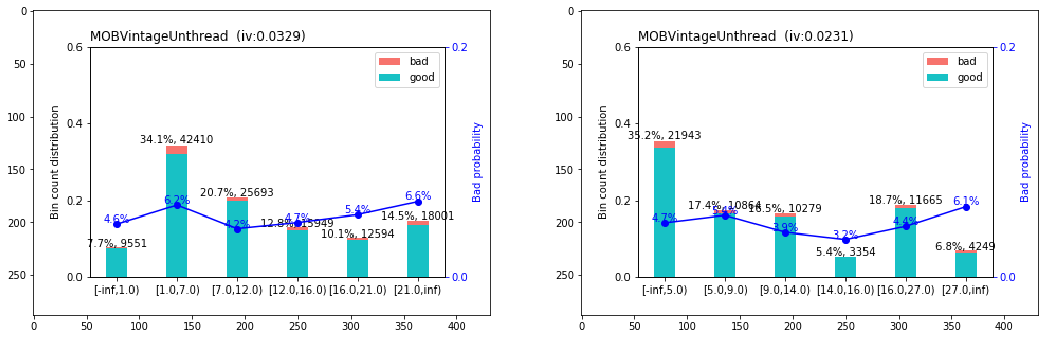

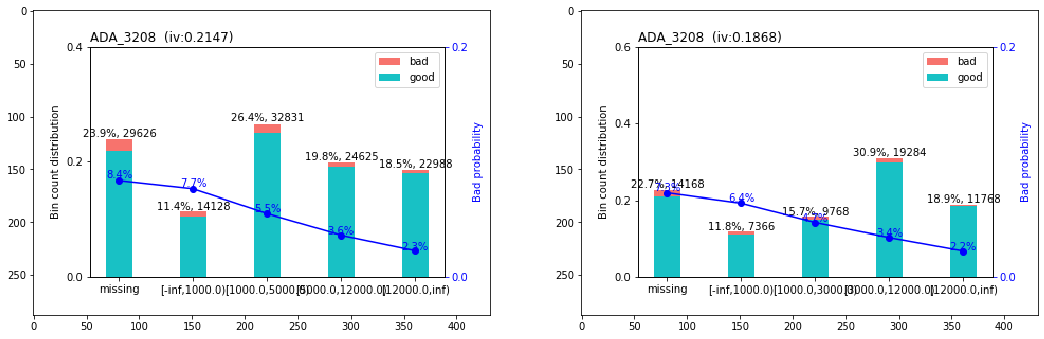

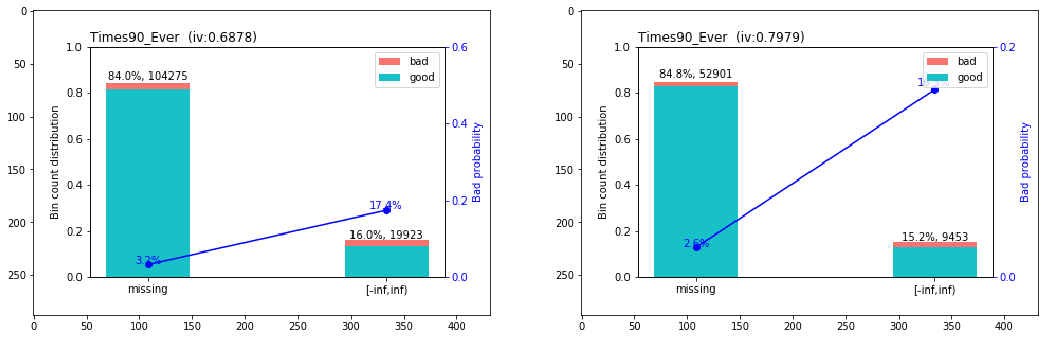

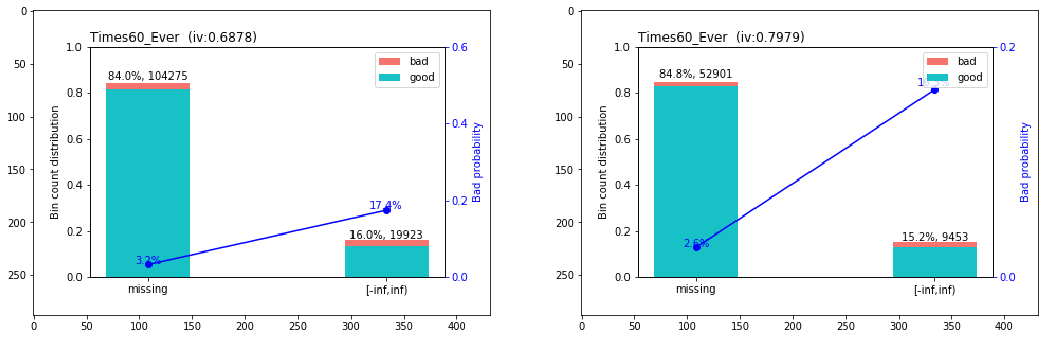

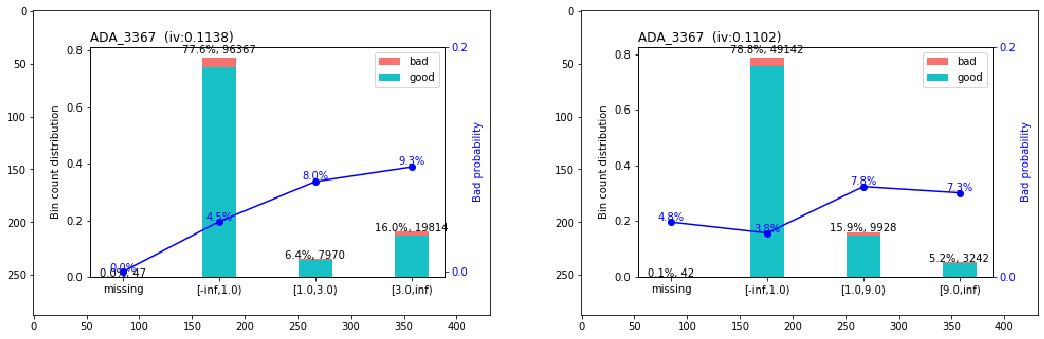

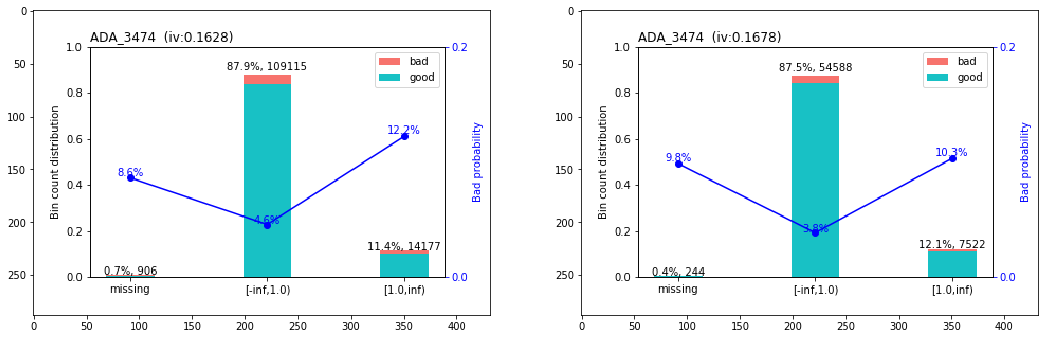

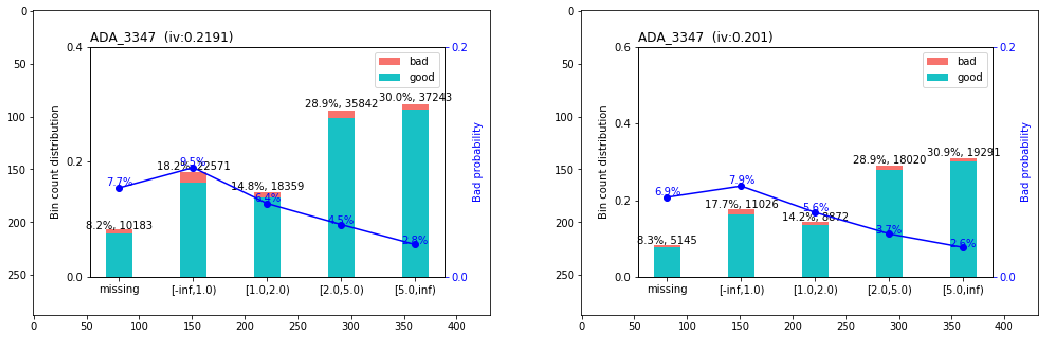

In [15]:
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 18 ,15

for key,i in plotlist.items():
    # read images
    img_A = mpimg.imread('/home/ec2-user/SageMaker/propensity_to_pay/slowsecure/char/' + str(key)+ '.png')
    img_B = mpimg.imread('/home/ec2-user/SageMaker/propensity_to_pay/model_monitor/slowsecure_char/'+ str(key)+ '.png')

    # display images
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_A)
    ax[1].imshow(img_B)


# plot slowunsecure chars and compare with development sample

In [16]:

rcParams['figure.figsize'] = 6.0 ,4.0
bins_adj = sc.woebin(df2, y="badflag")

[INFO] creating woe binning ...
Binning on 330891 rows and 39 columns in 00:00:47


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figu

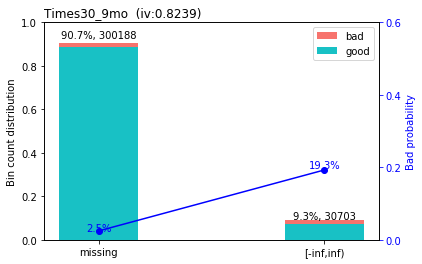

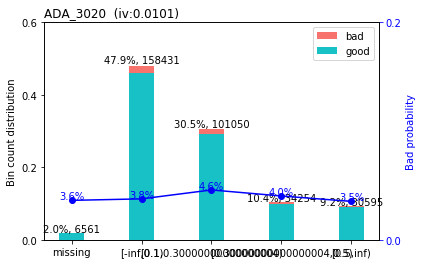

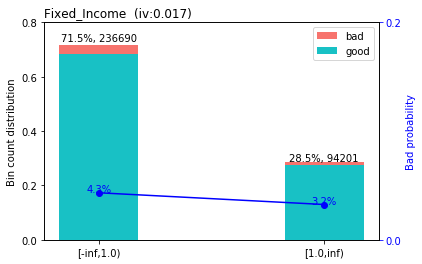

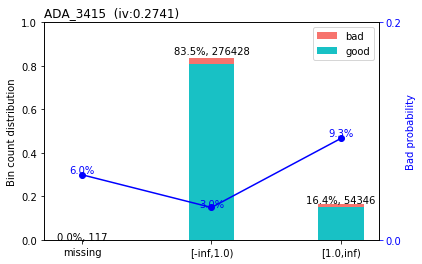

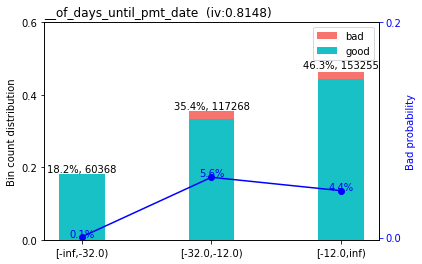

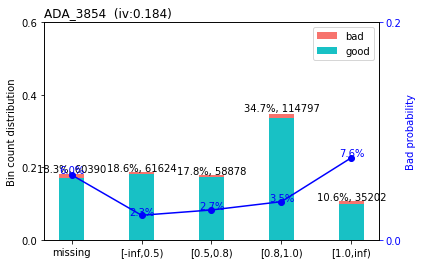

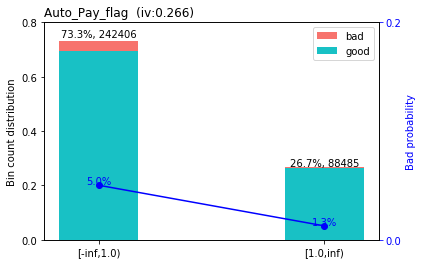

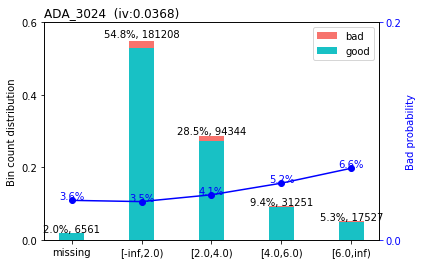

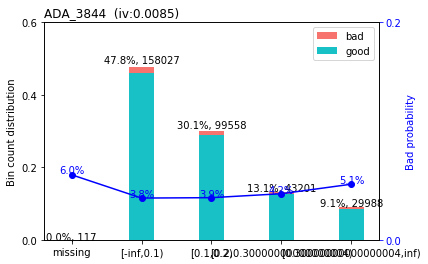

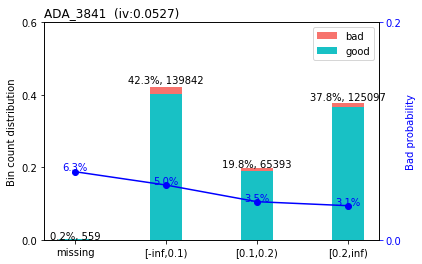

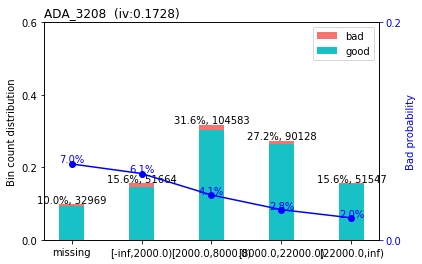

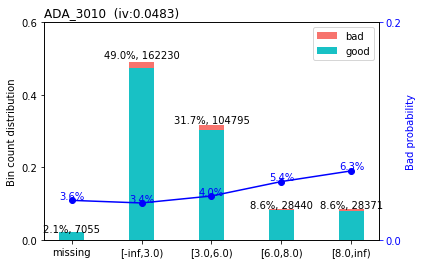

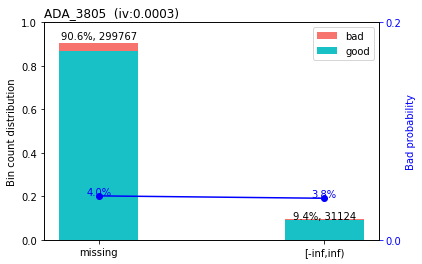

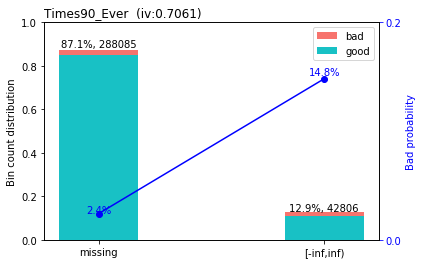

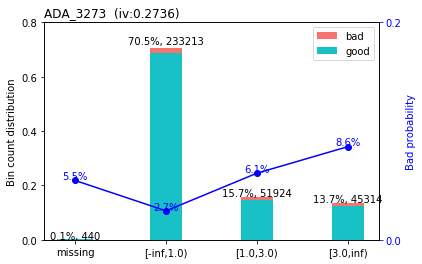

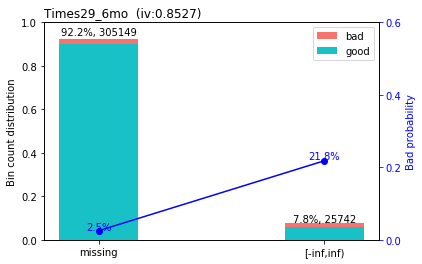

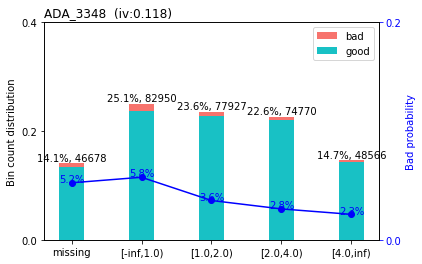

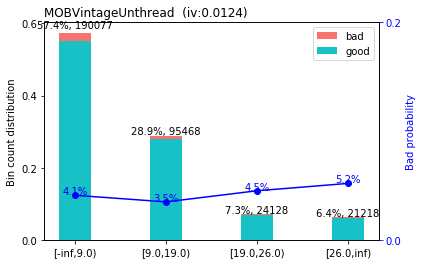

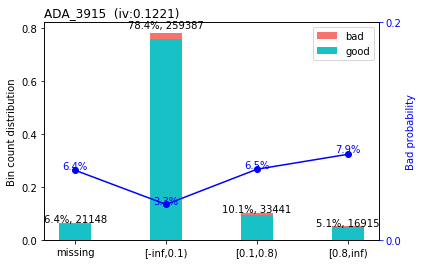

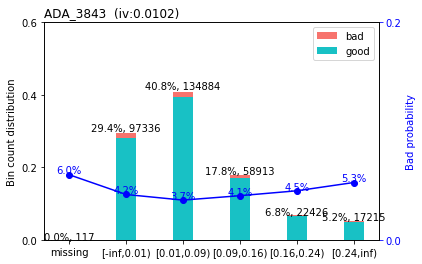

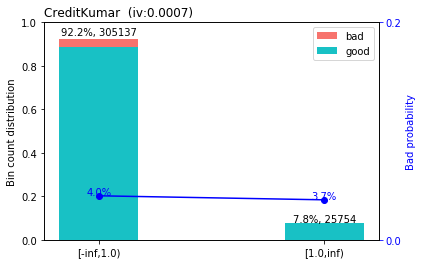

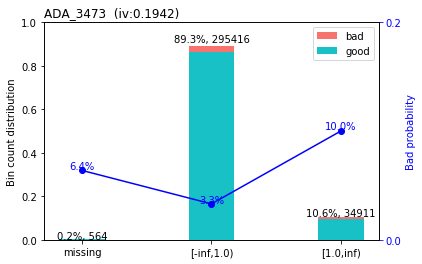

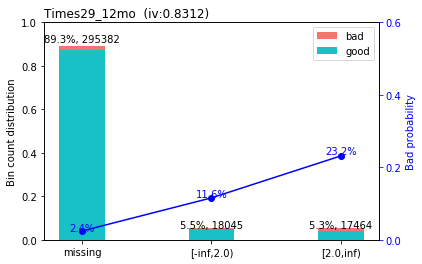

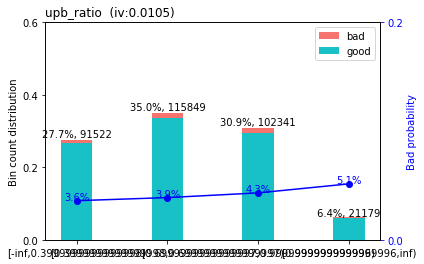

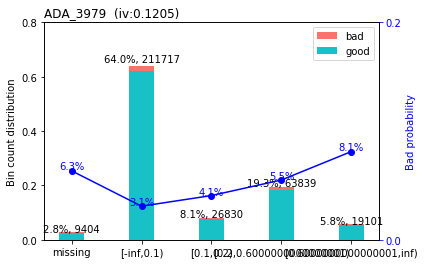

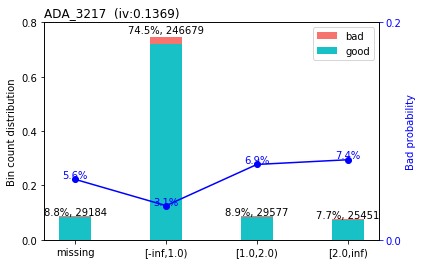

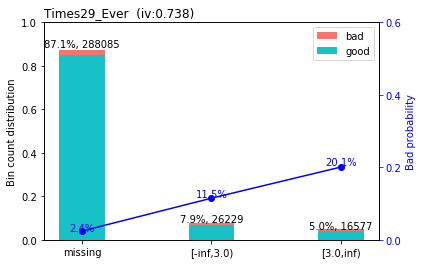

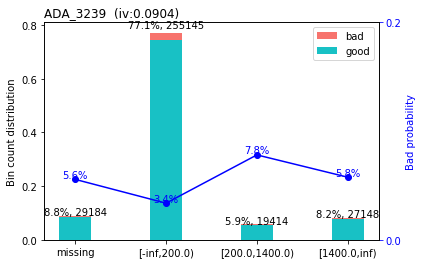

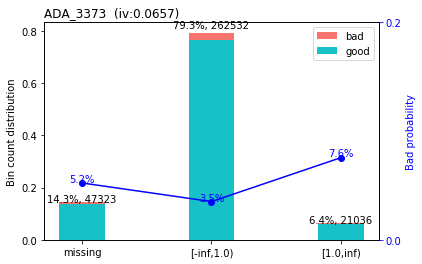

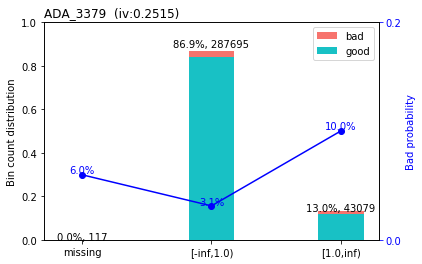

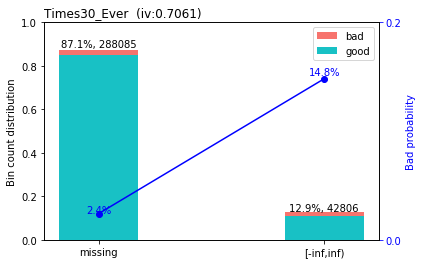

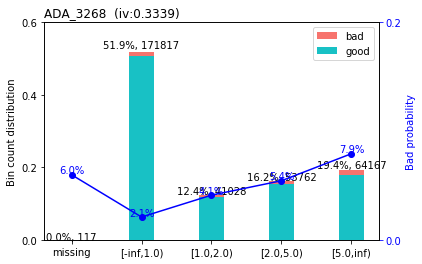

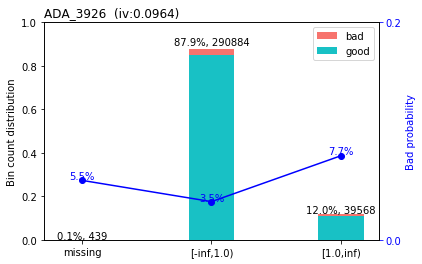

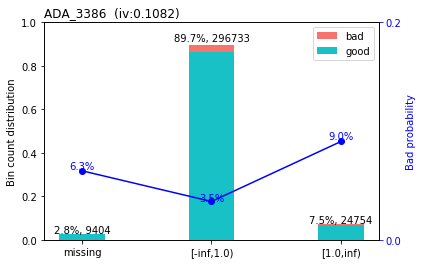

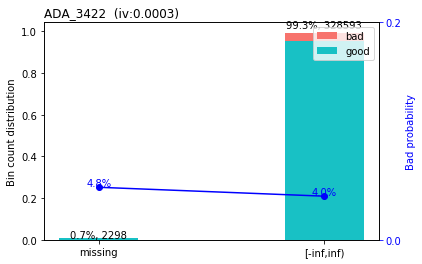

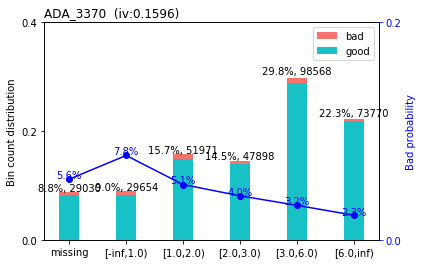

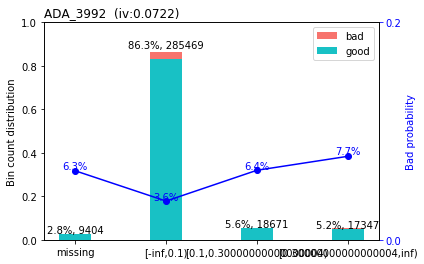

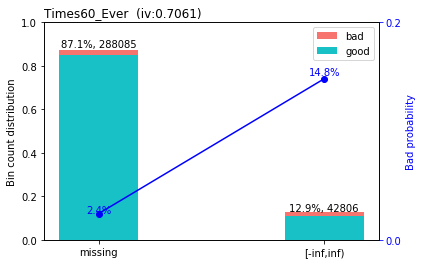

In [17]:
plotlist=sc.woebin_plot(bins_adj)
for key,i in plotlist.items():
#     plt.show(i)
    i.savefig('/home/ec2-user/SageMaker/propensity_to_pay/model_monitor/slowunsecure_char/'+str(key)+'.png')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


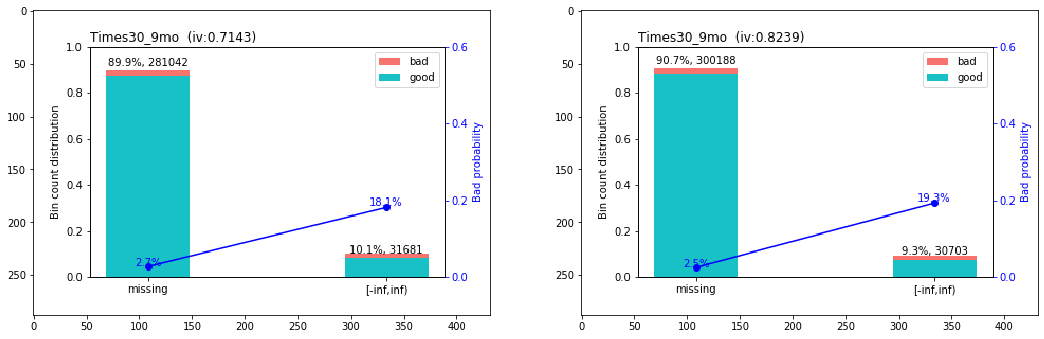

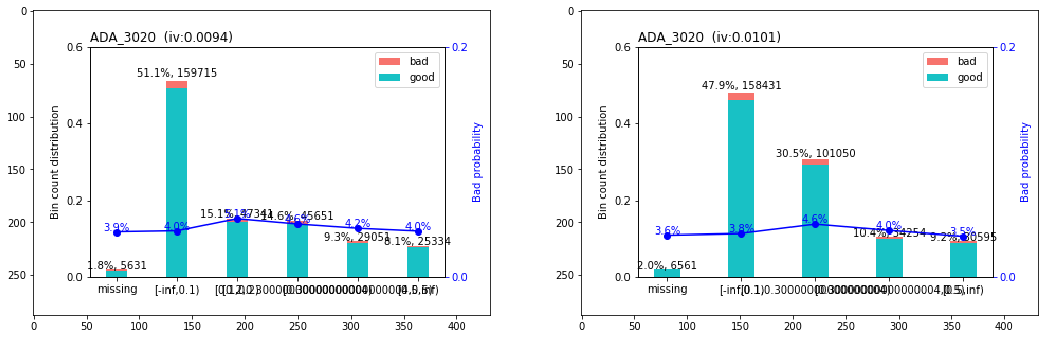

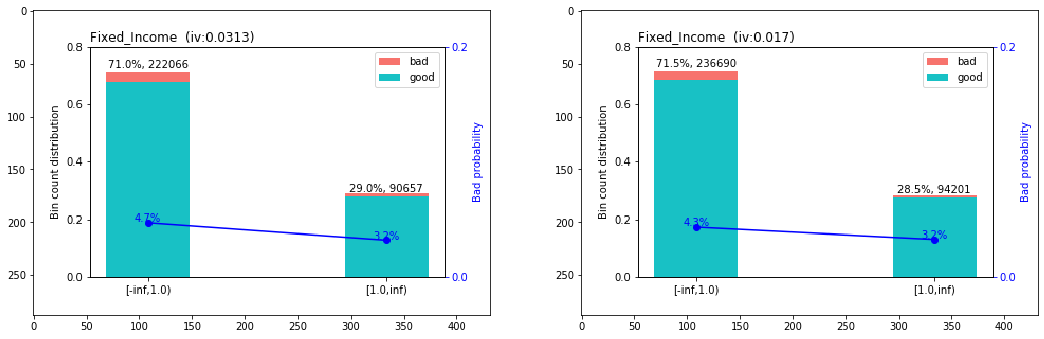

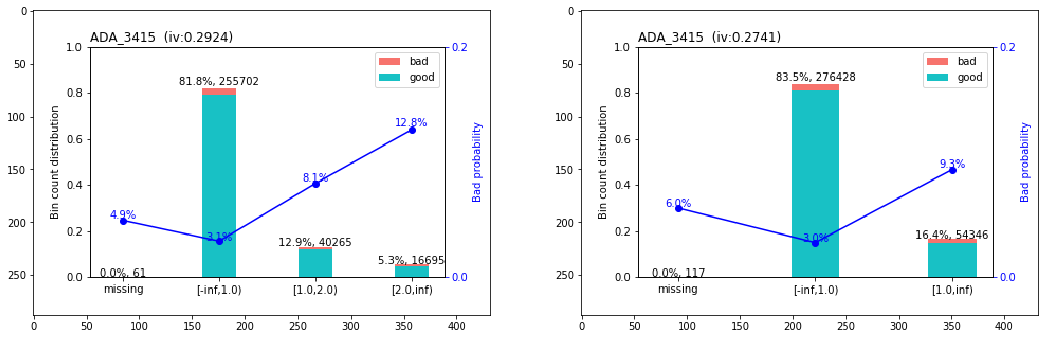

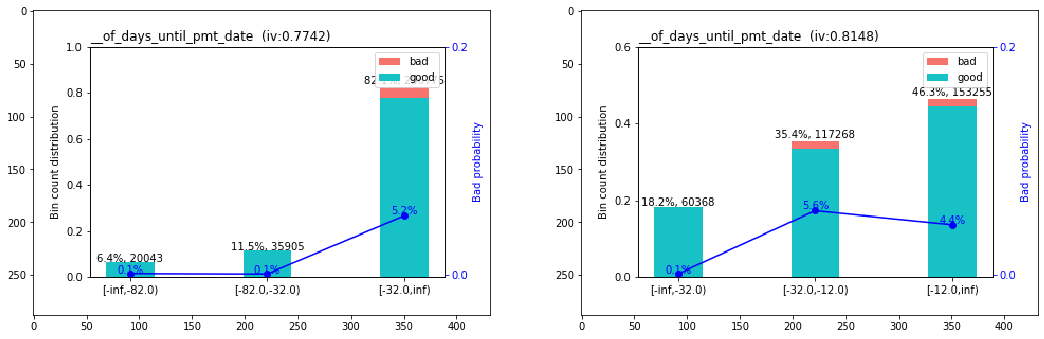

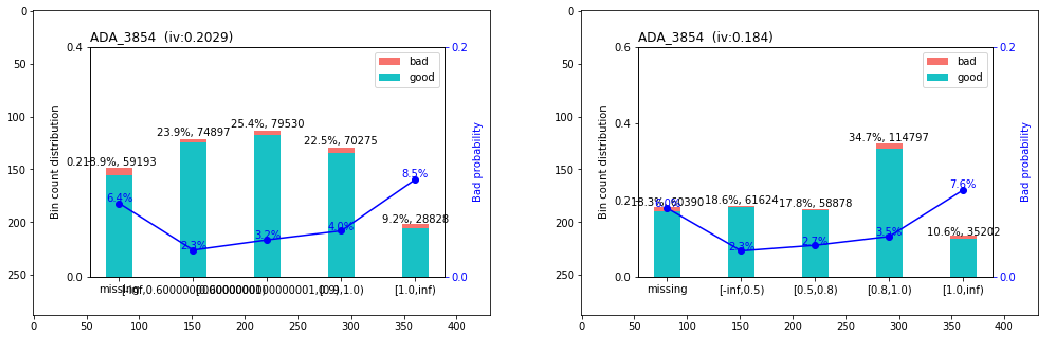

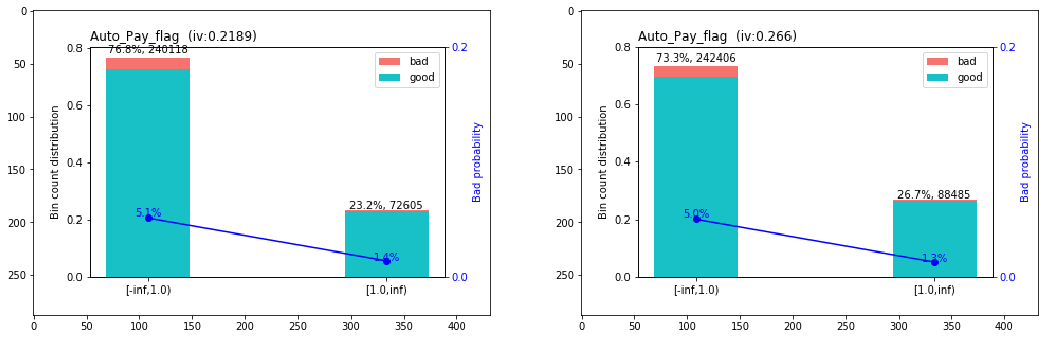

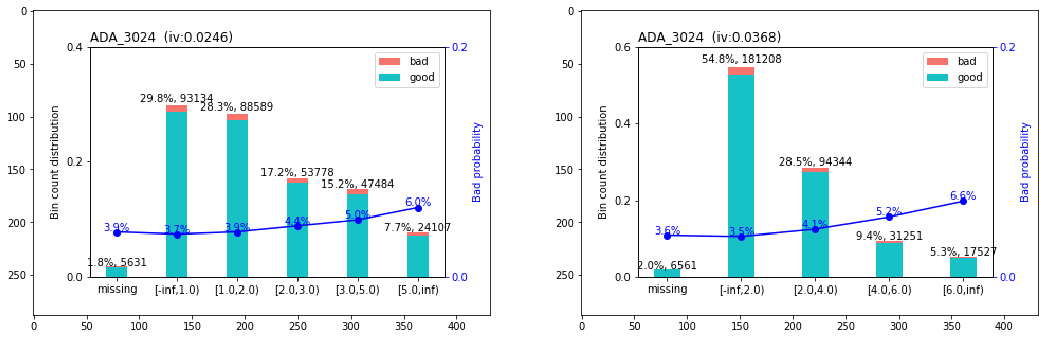

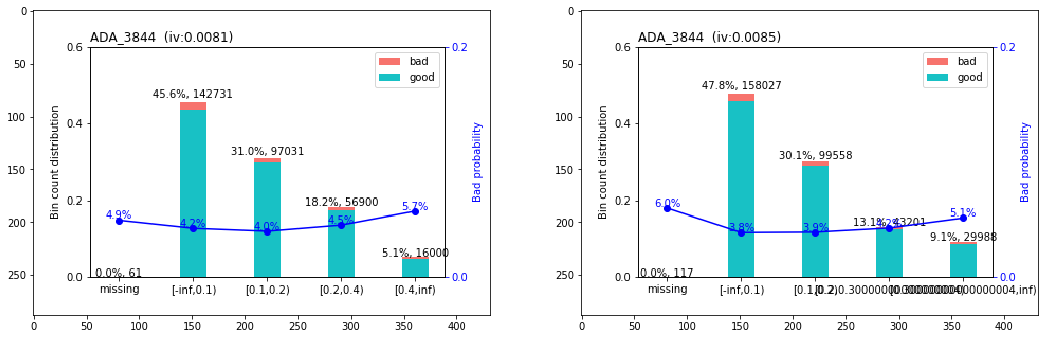

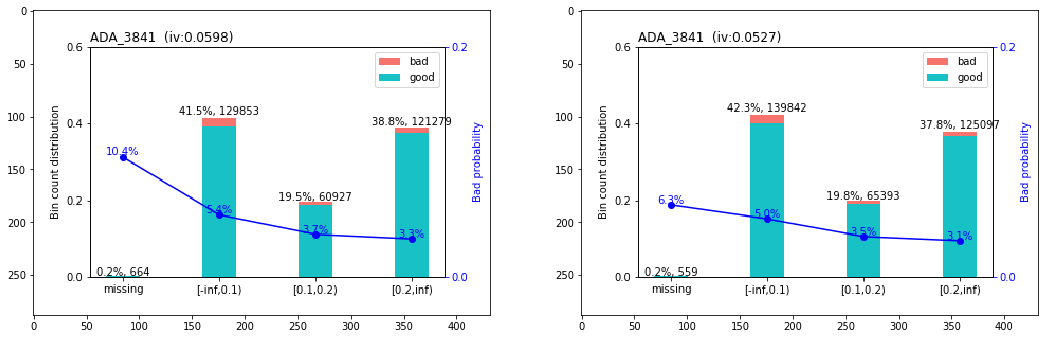

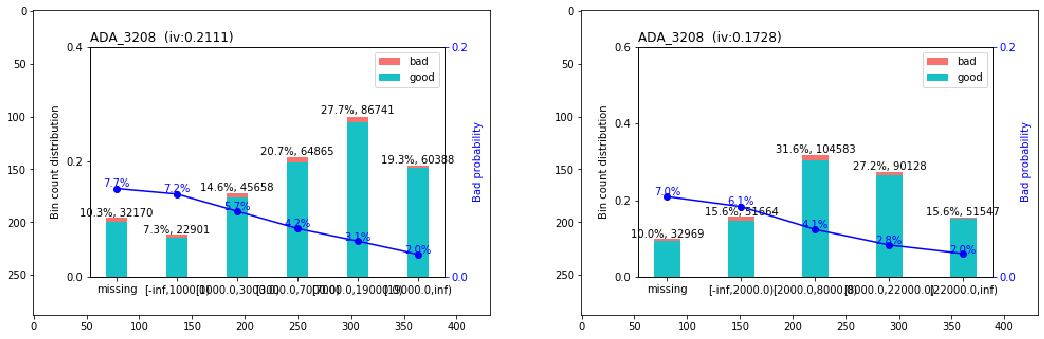

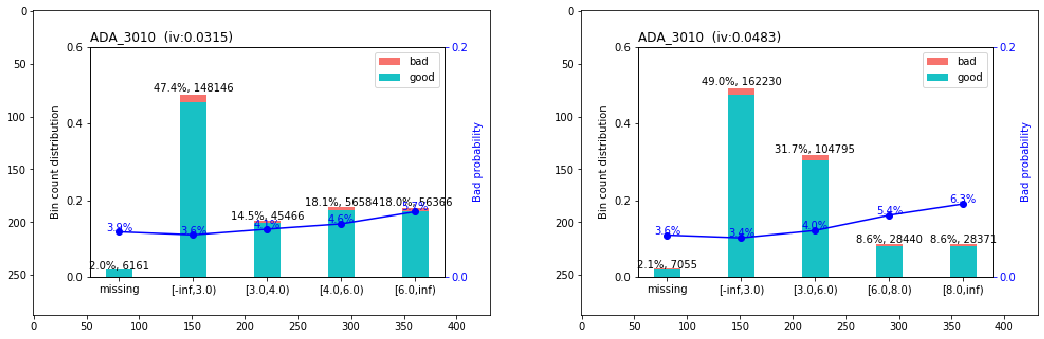

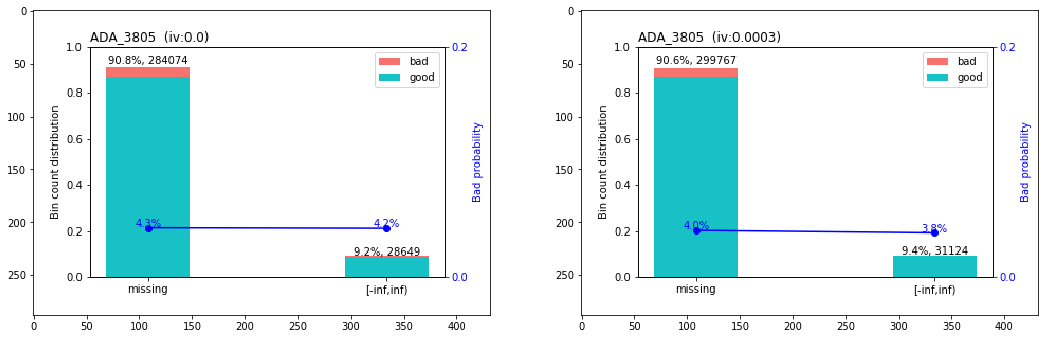

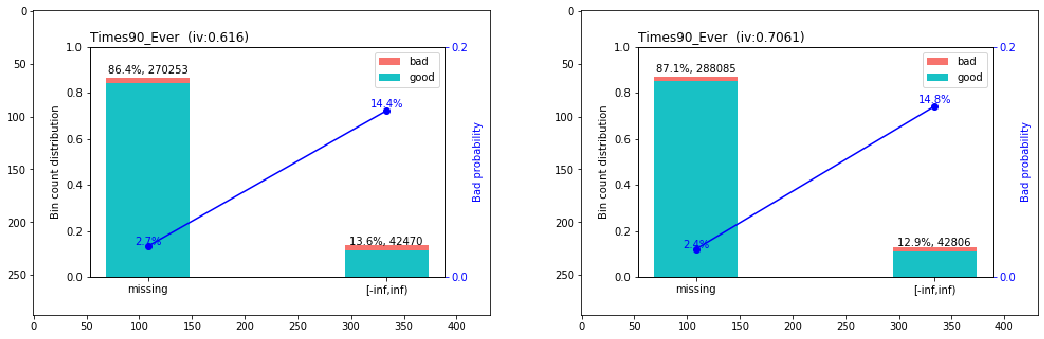

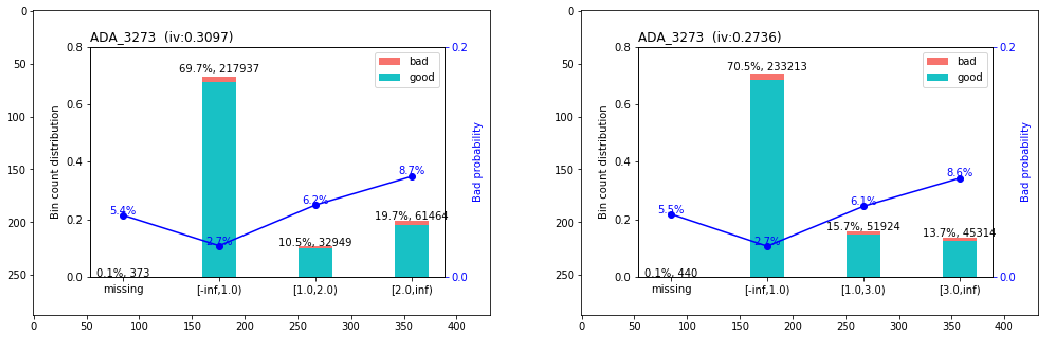

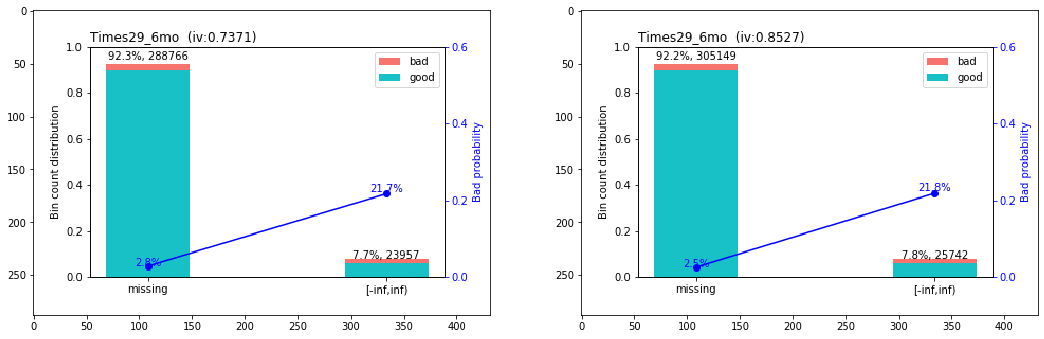

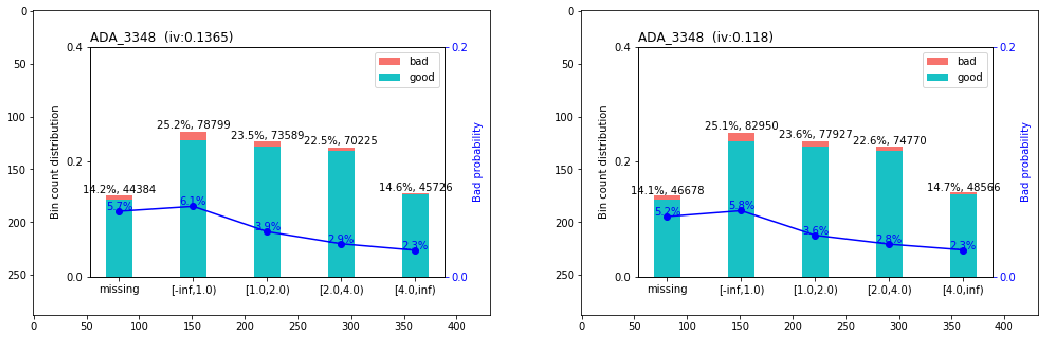

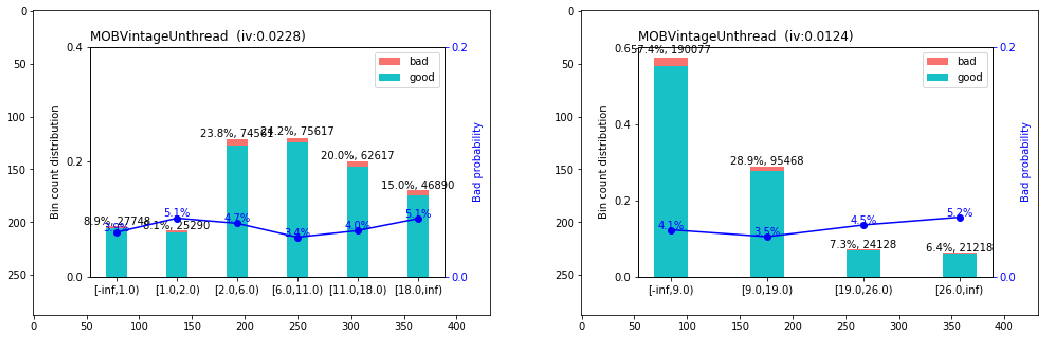

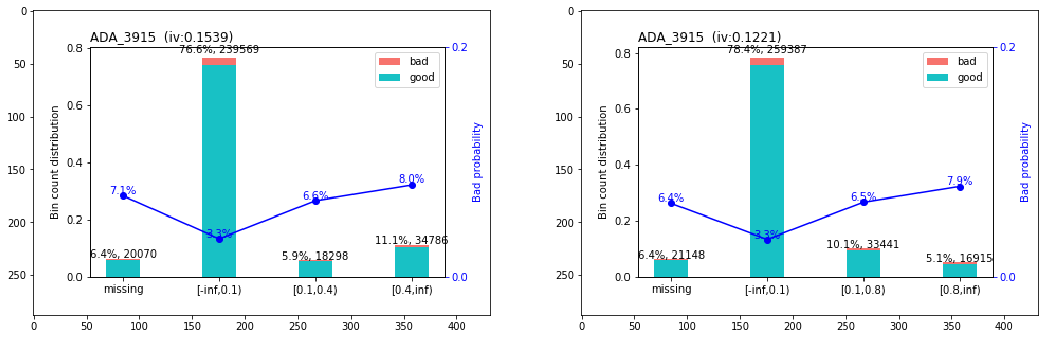

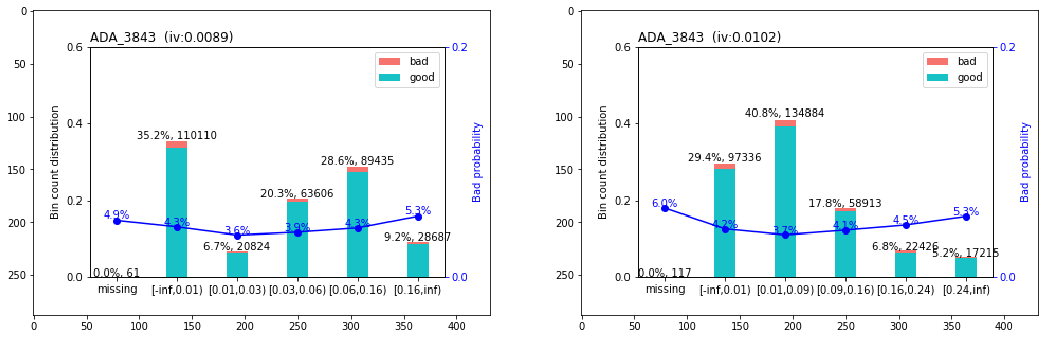

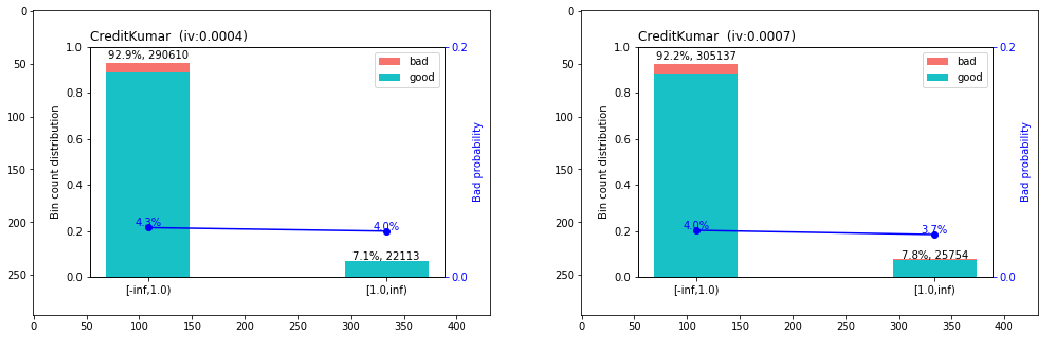

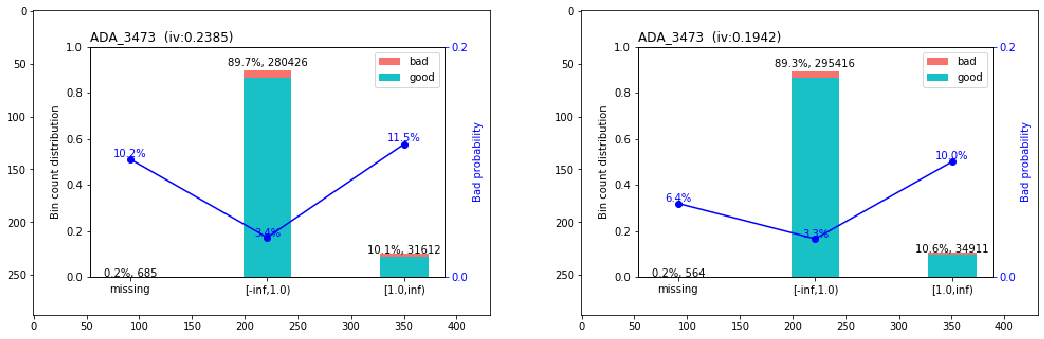

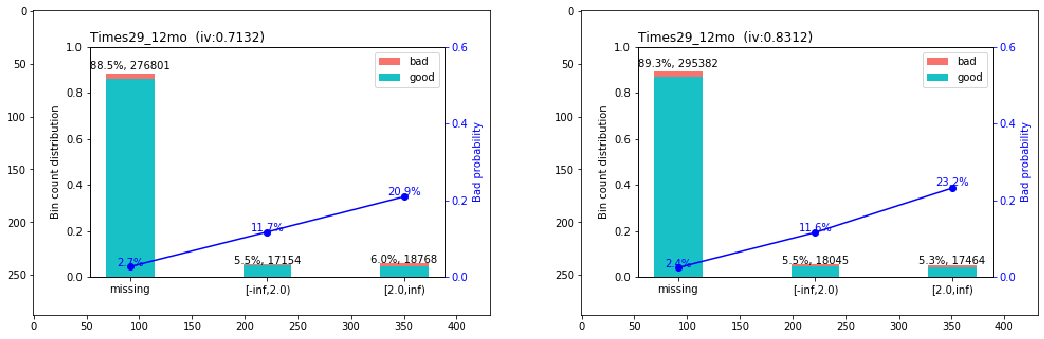

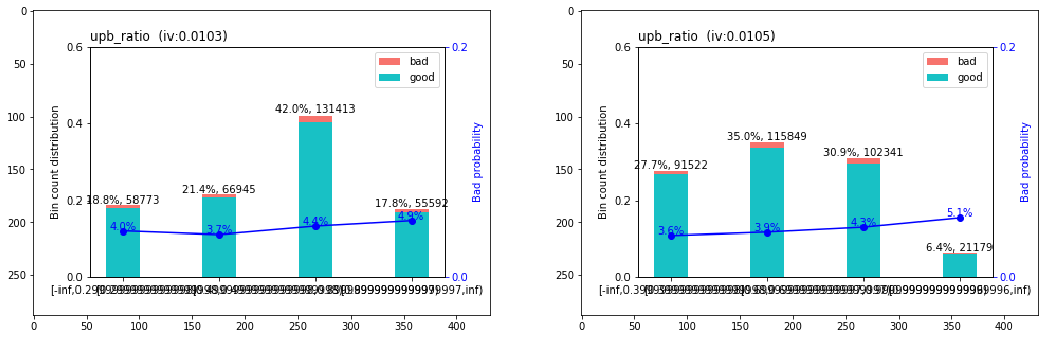

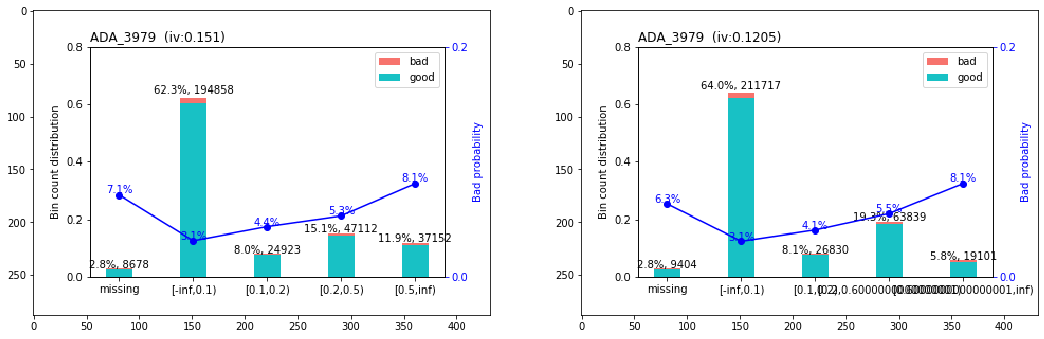

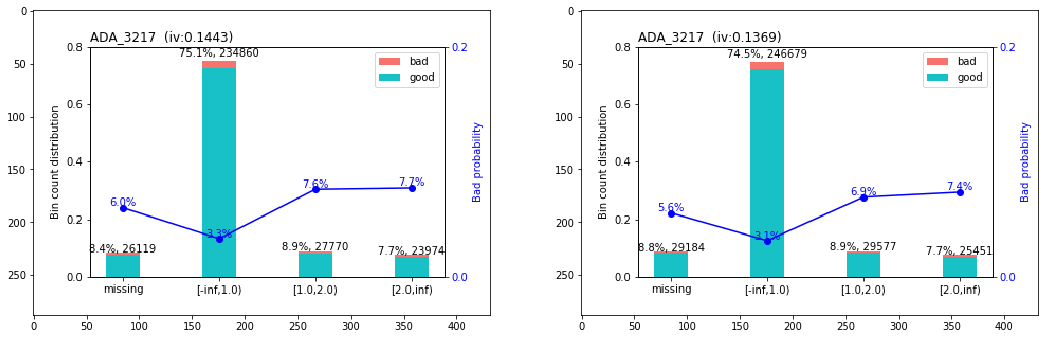

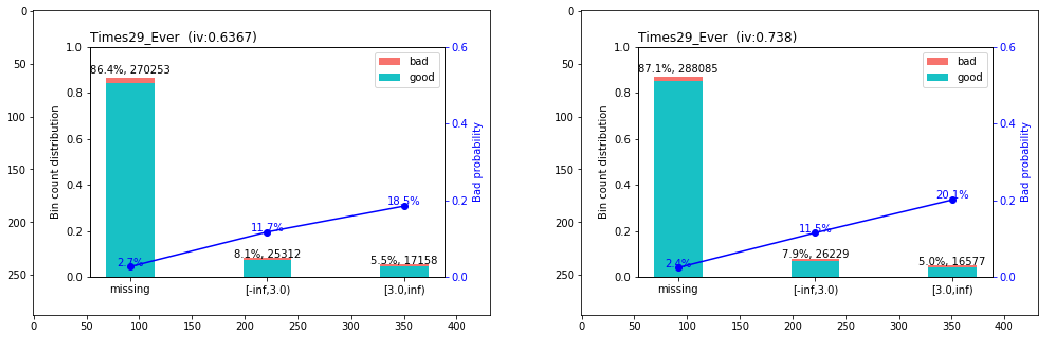

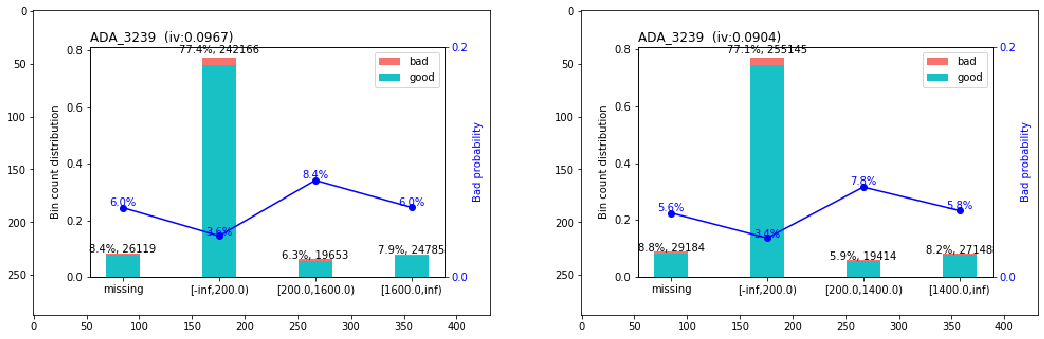

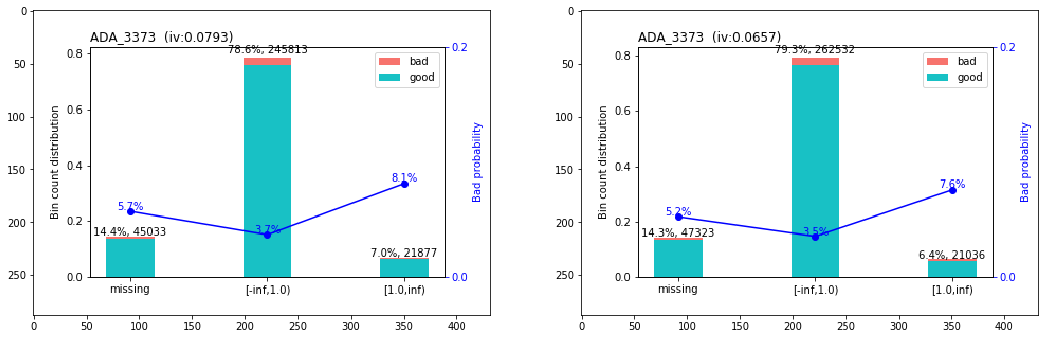

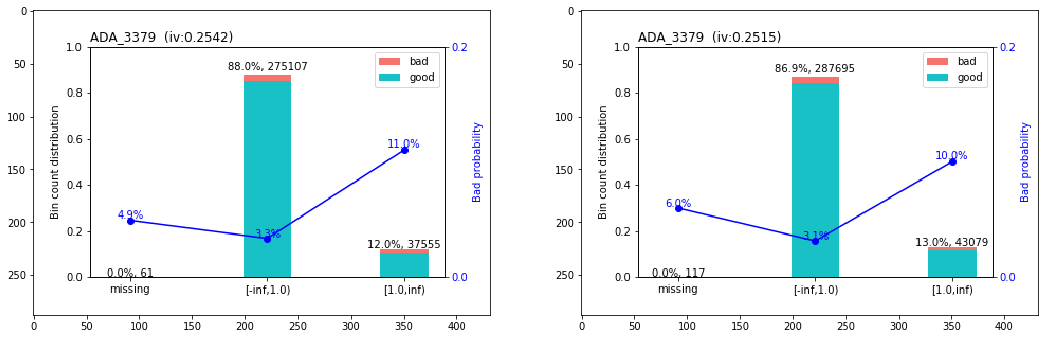

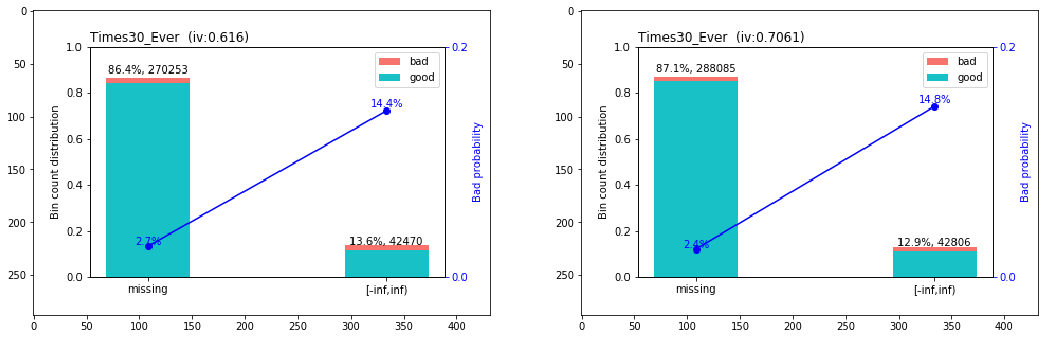

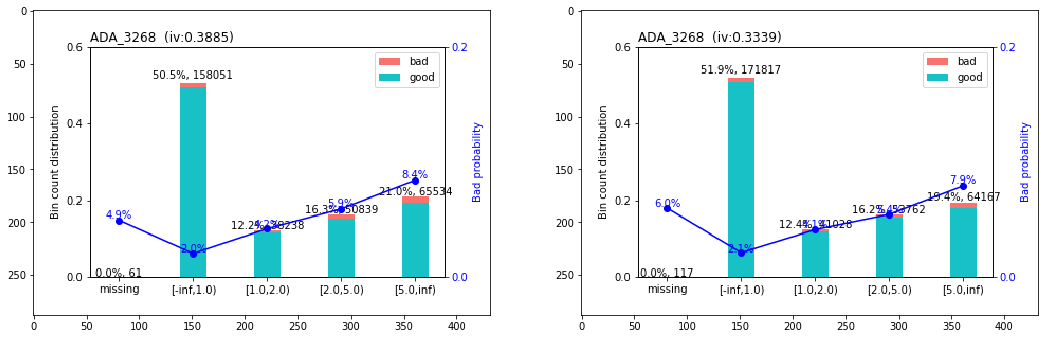

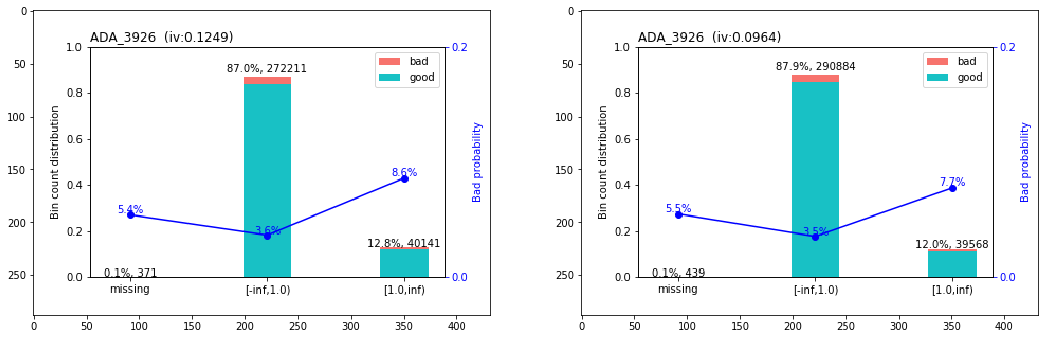

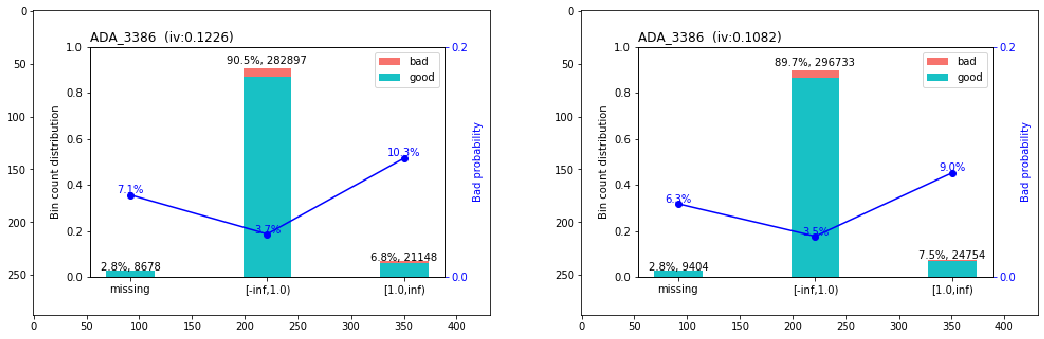

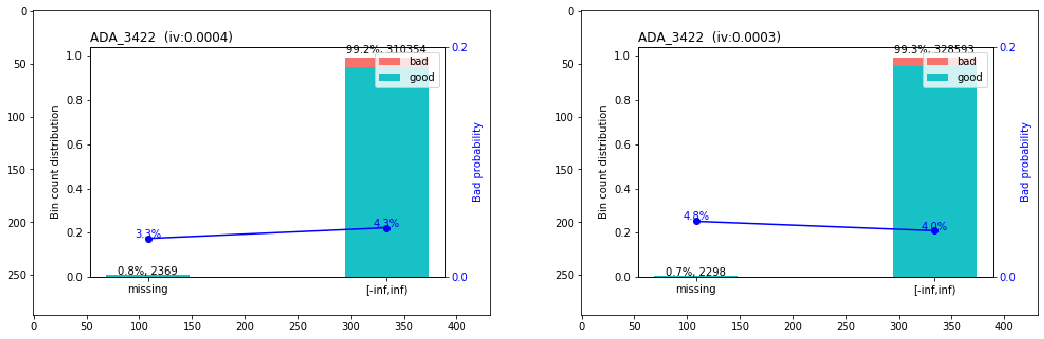

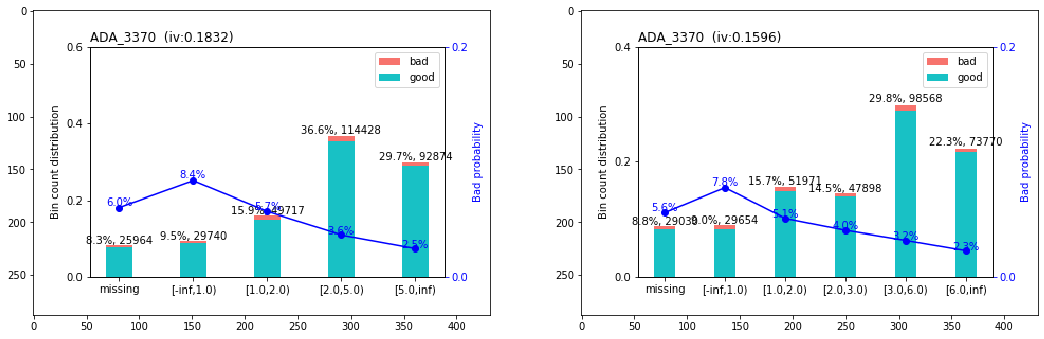

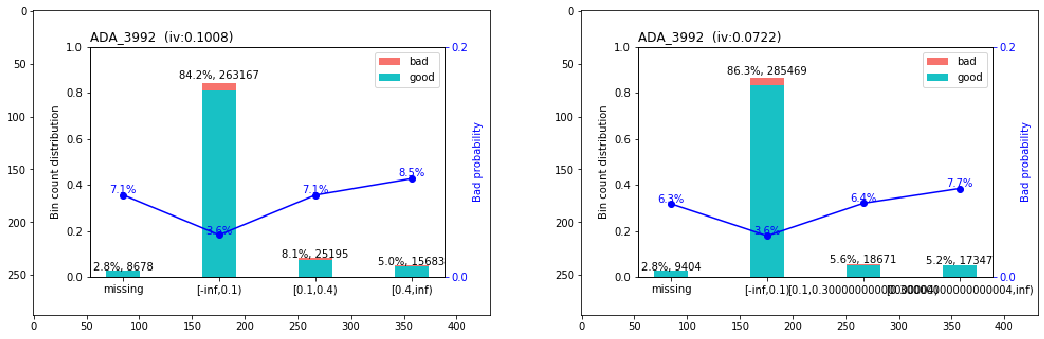

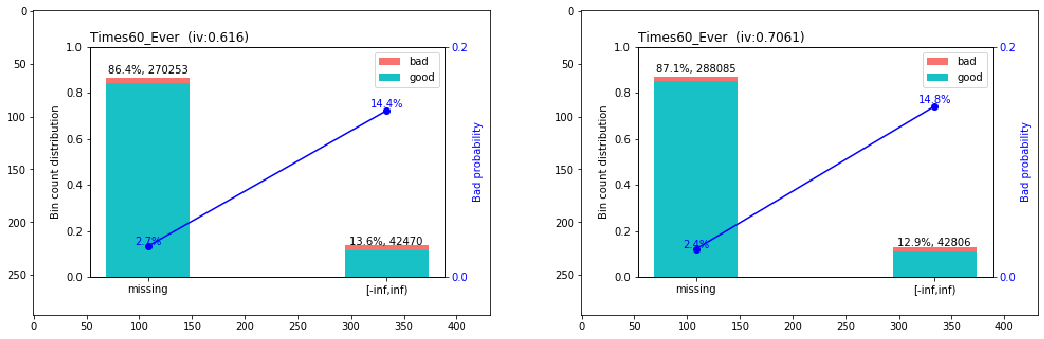

In [18]:
# figure size in inches optional
rcParams['figure.figsize'] = 18 ,15

for key,i in plotlist.items():
    # read images
    img_A = mpimg.imread('/home/ec2-user/SageMaker/propensity_to_pay/slowunsecure/char/' + str(key)+ '.png')
    img_B = mpimg.imread('/home/ec2-user/SageMaker/propensity_to_pay/model_monitor/slowunsecure_char/'+ str(key)+ '.png')

    # display images
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_A)
    ax[1].imshow(img_B)

[INFO] creating woe binning ...
Binning on 147711 rows and 38 columns in 00:00:26


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figu

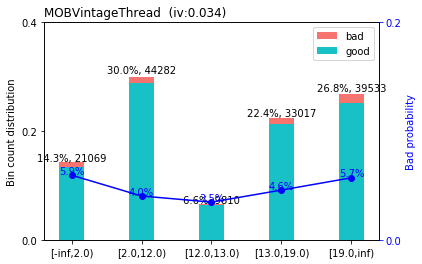

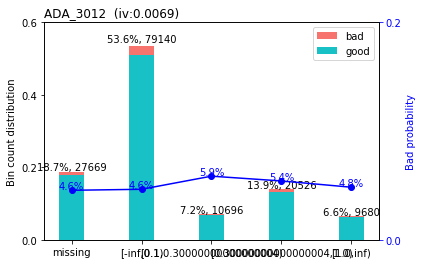

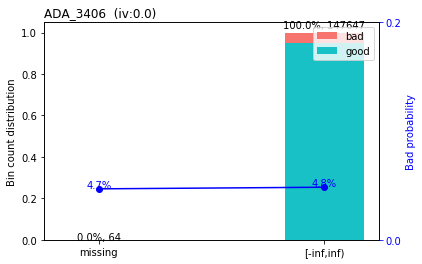

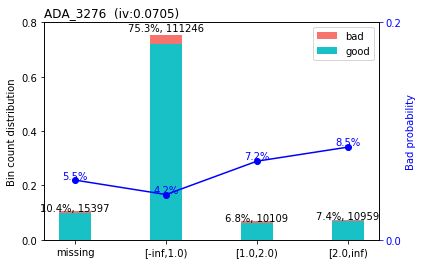

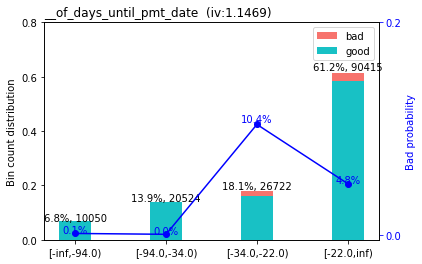

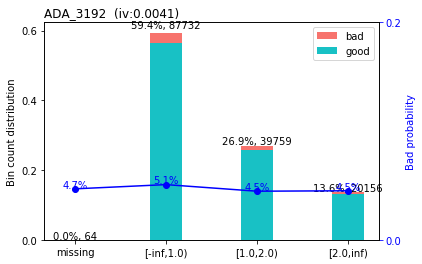

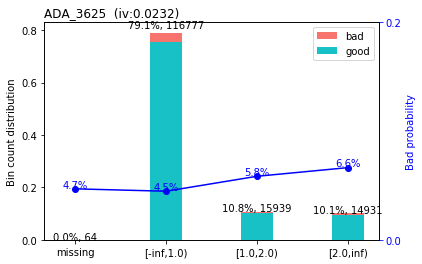

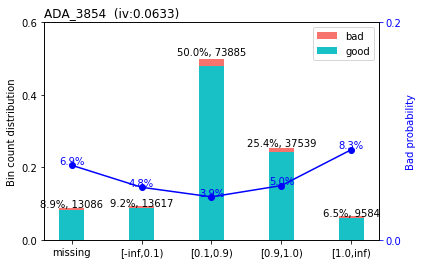

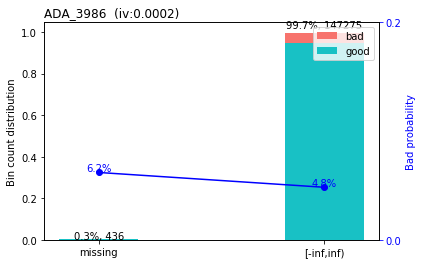

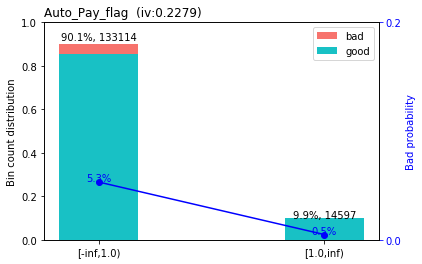

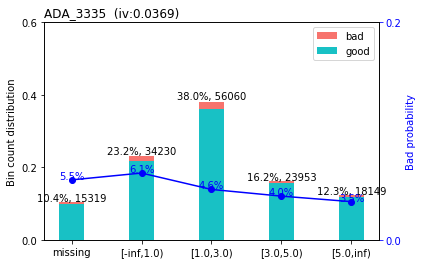

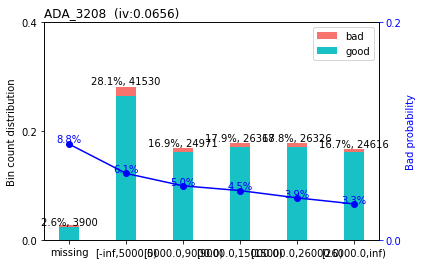

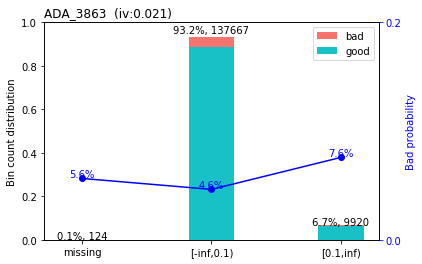

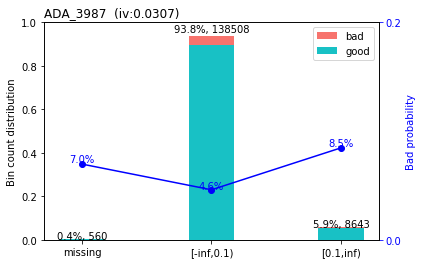

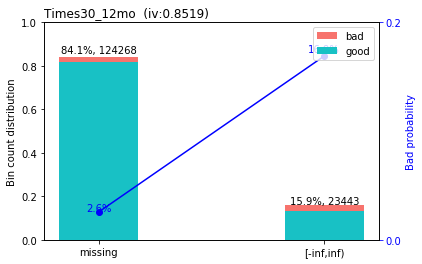

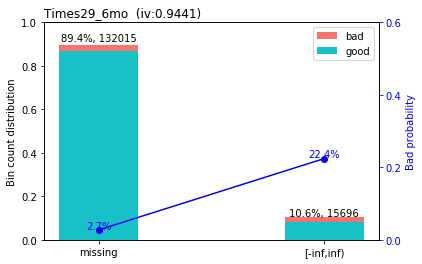

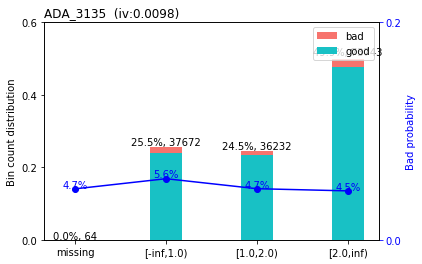

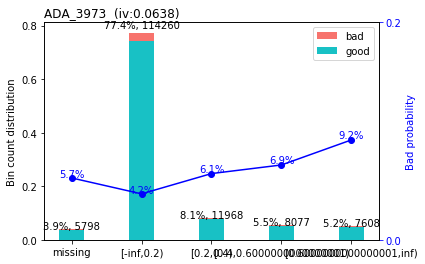

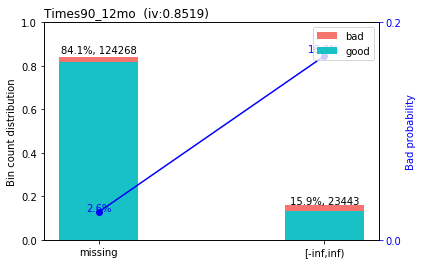

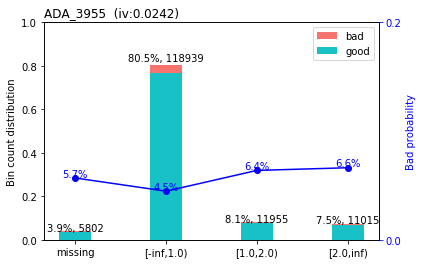

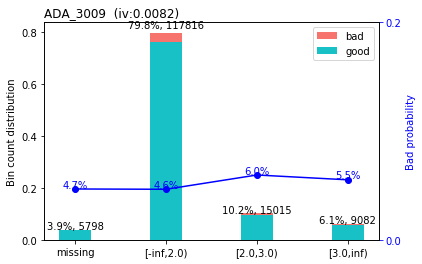

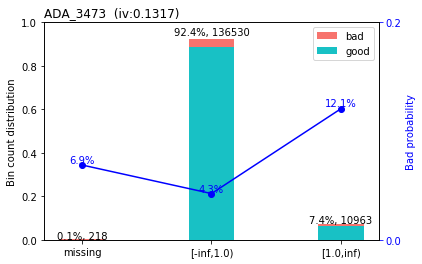

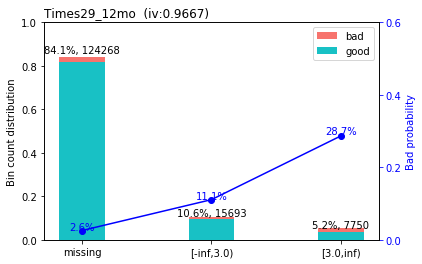

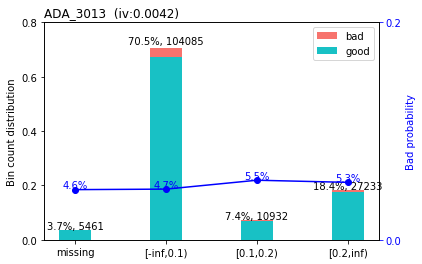

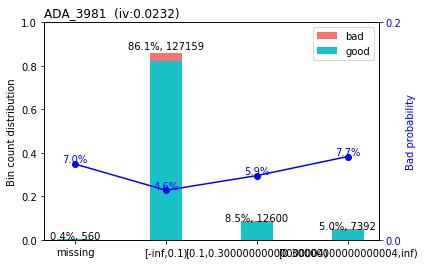

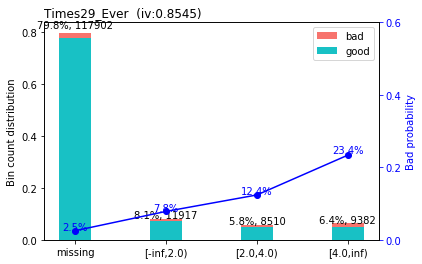

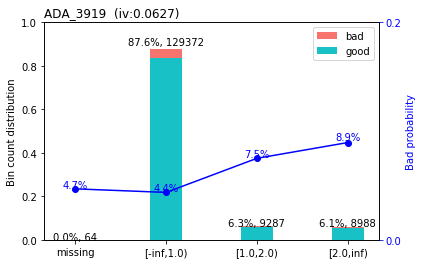

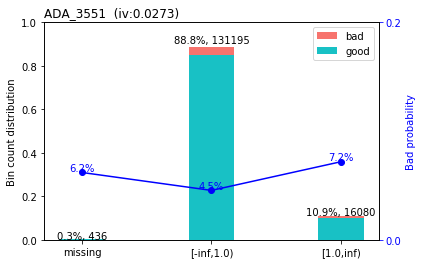

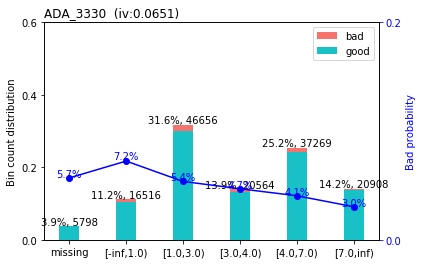

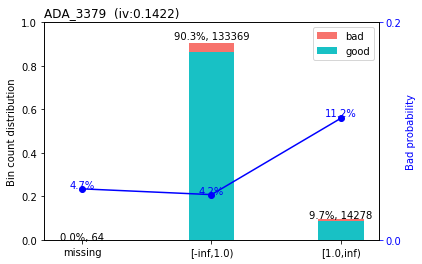

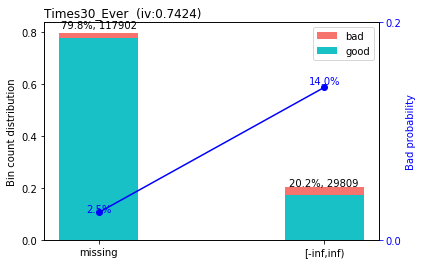

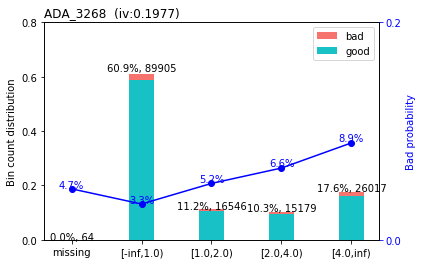

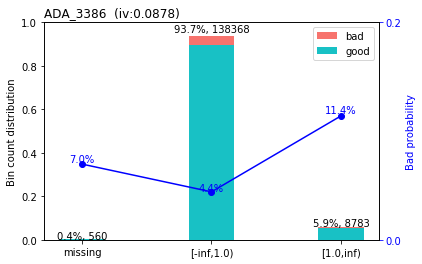

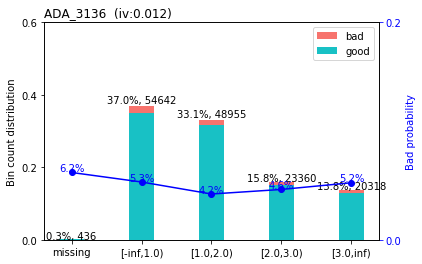

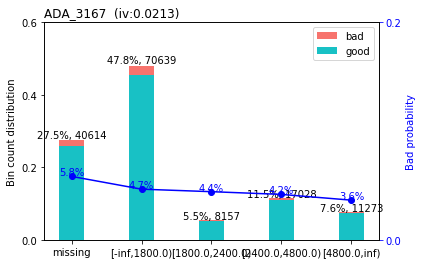

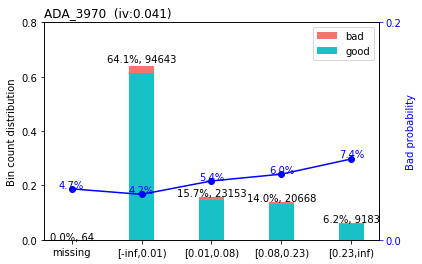

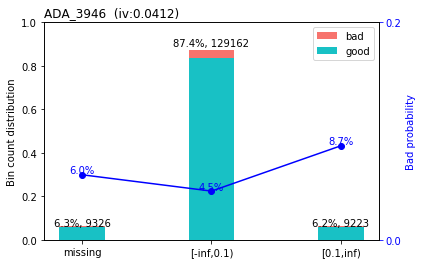

In [19]:
#plot slownoappl and compare with development sample
rcParams['figure.figsize'] = 6.0 ,4.0
bins_adj = sc.woebin(df3, y="badflag")
plotlist=sc.woebin_plot(bins_adj)
for key,i in plotlist.items():
#     plt.show(i)
    i.savefig('/home/ec2-user/SageMaker/propensity_to_pay/model_monitor/slownoappl_char/'+str(key)+'.png')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


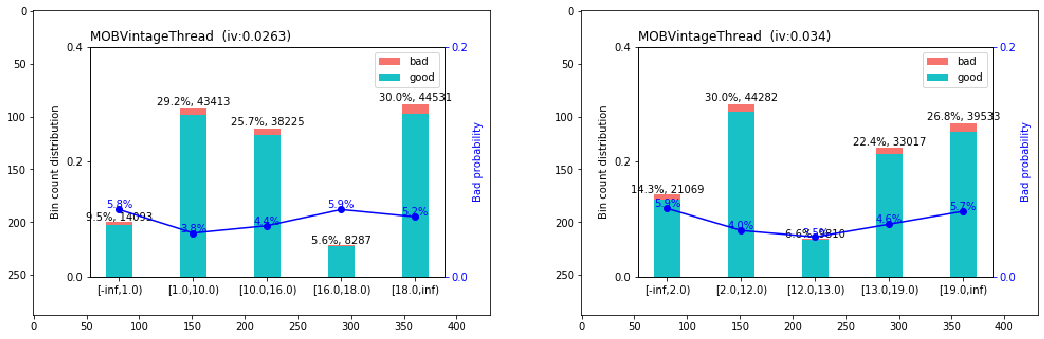

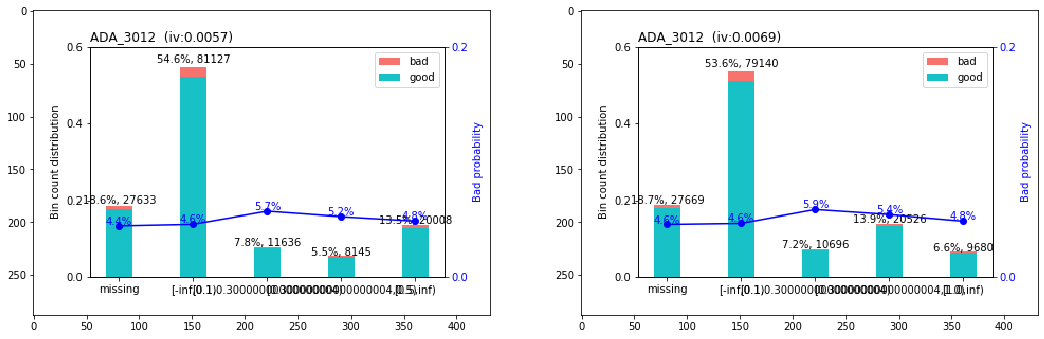

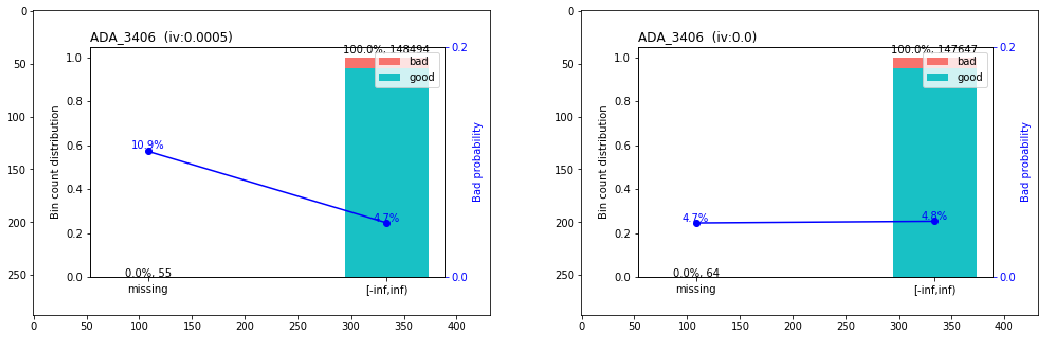

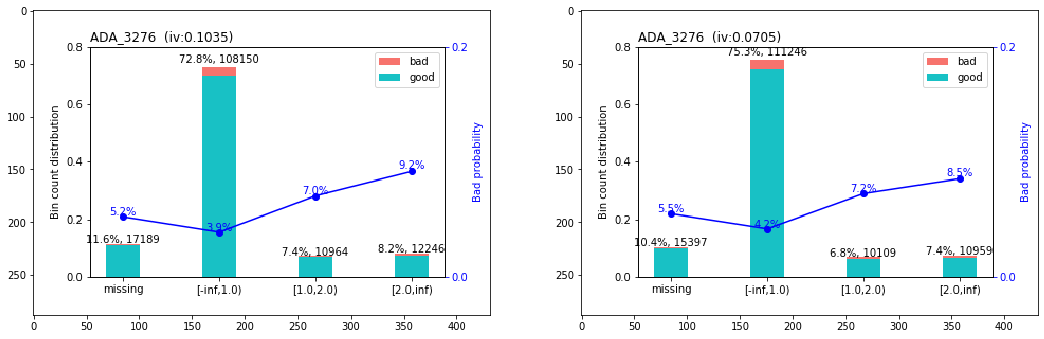

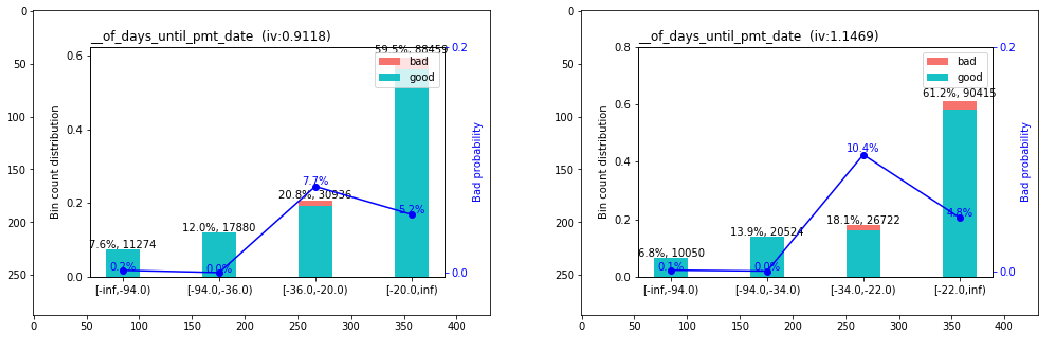

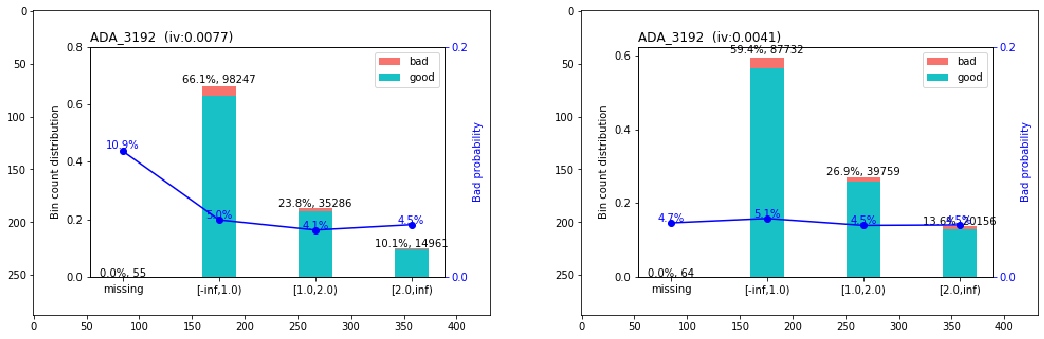

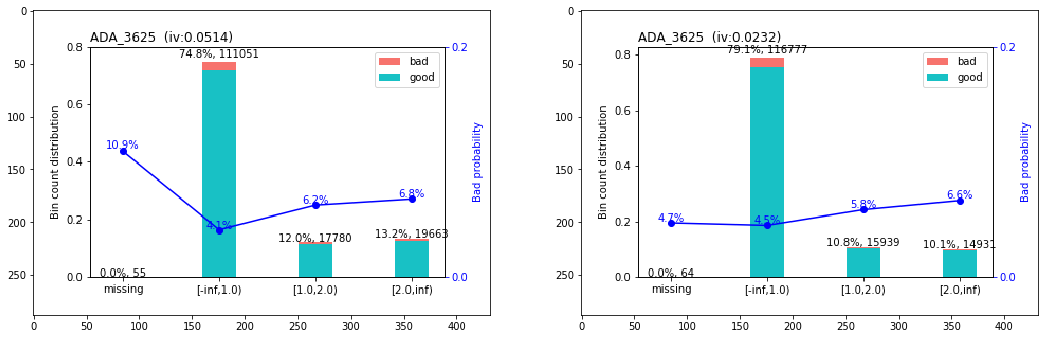

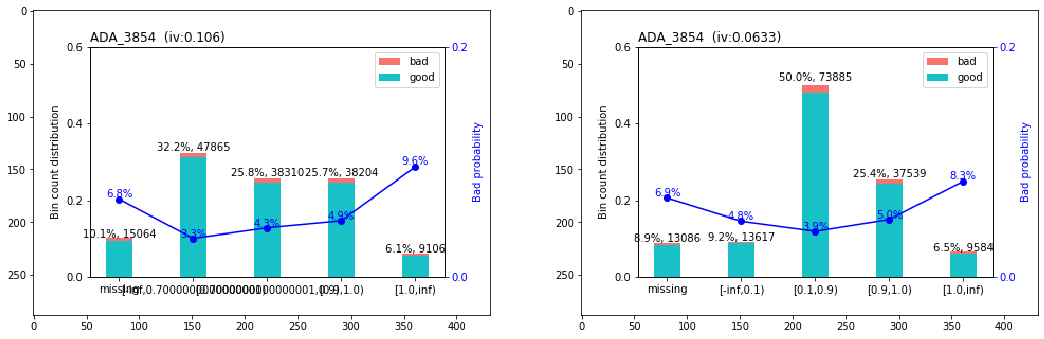

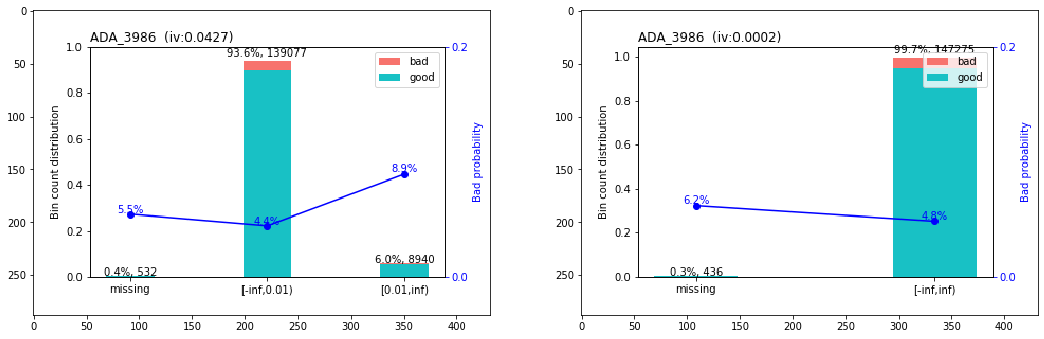

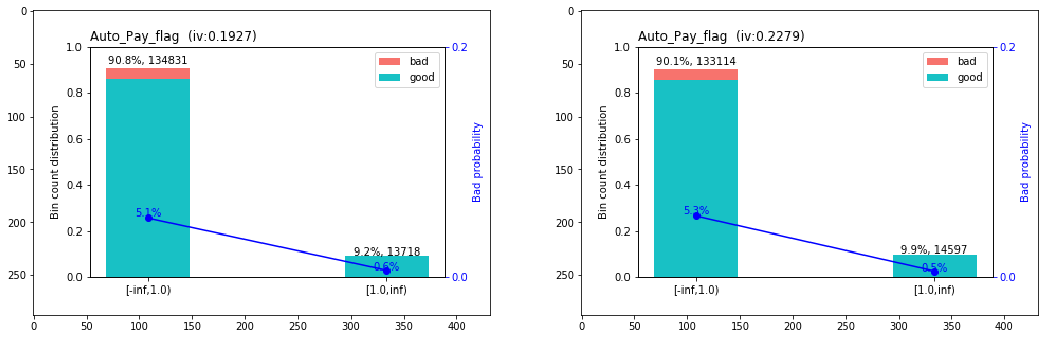

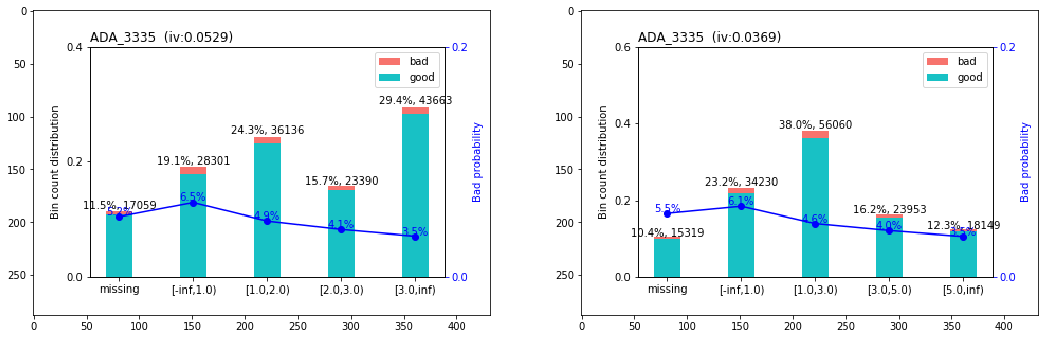

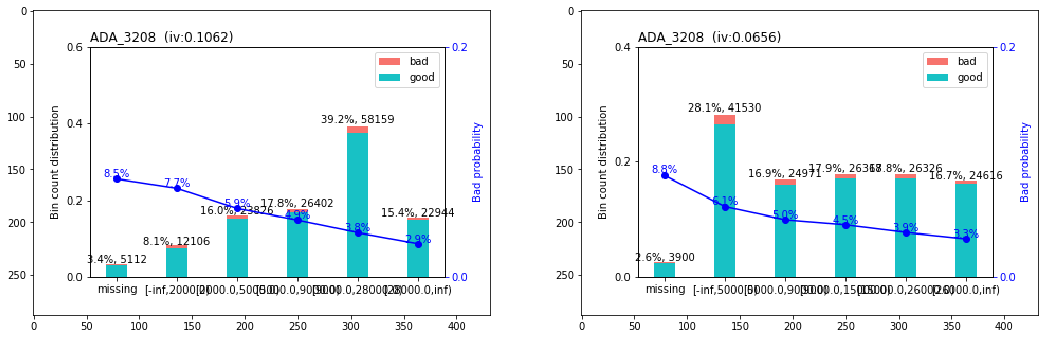

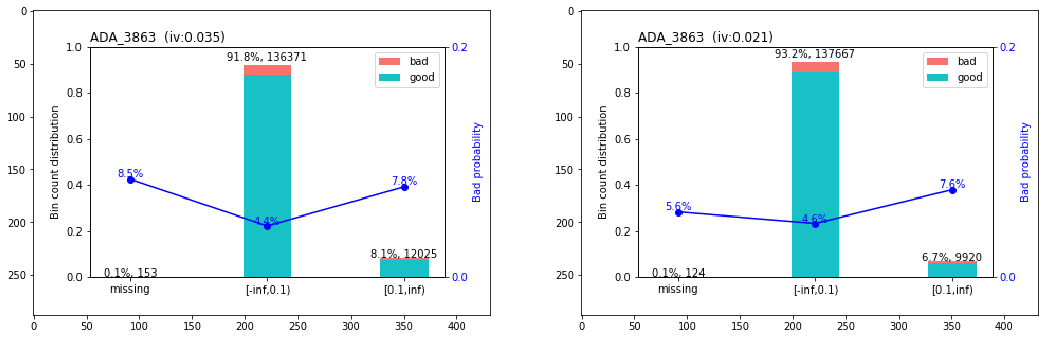

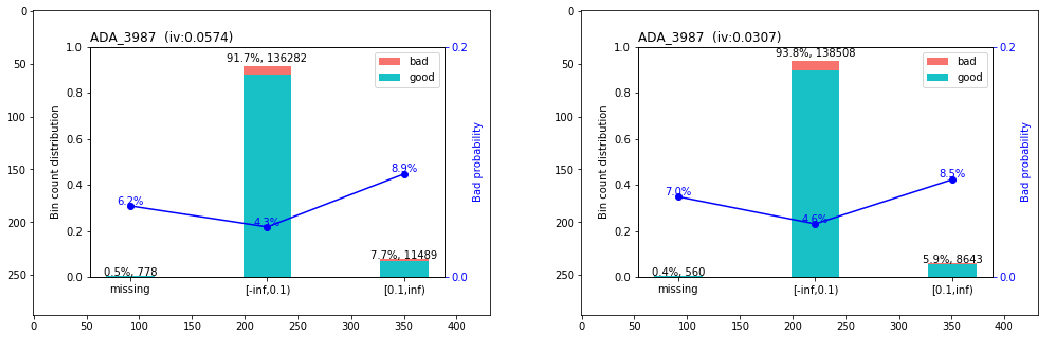

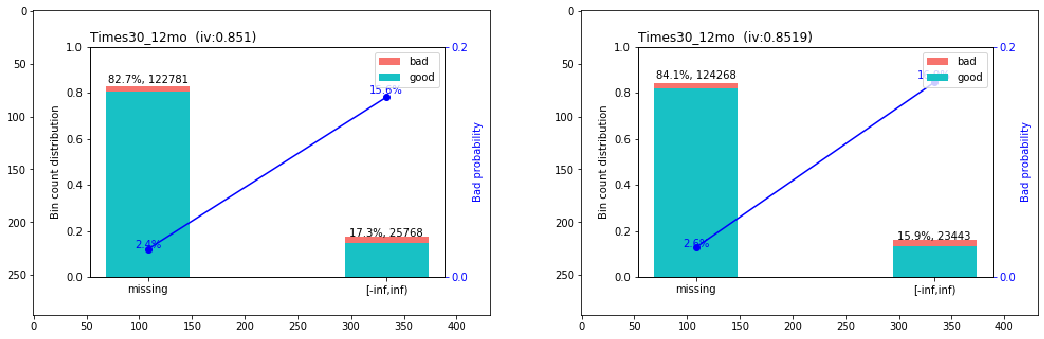

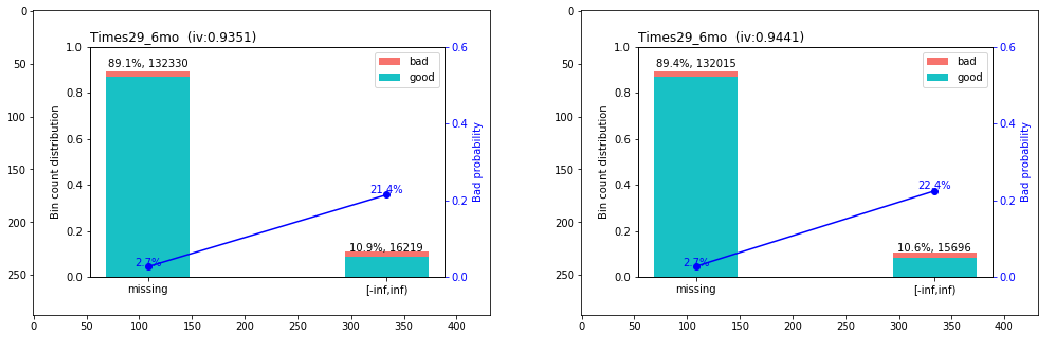

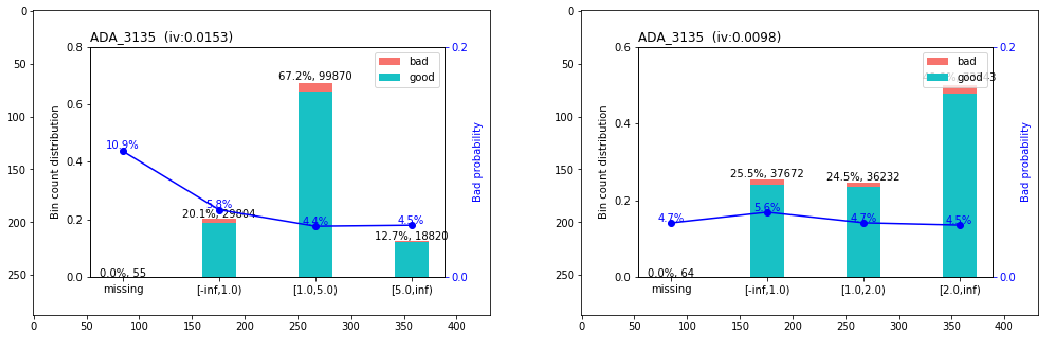

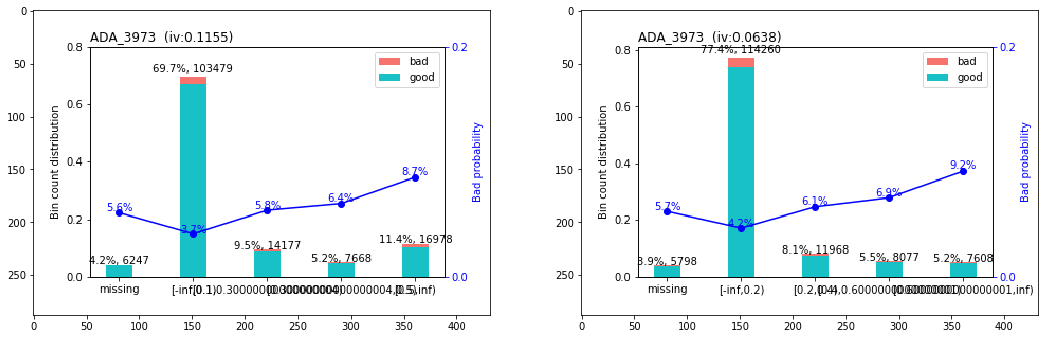

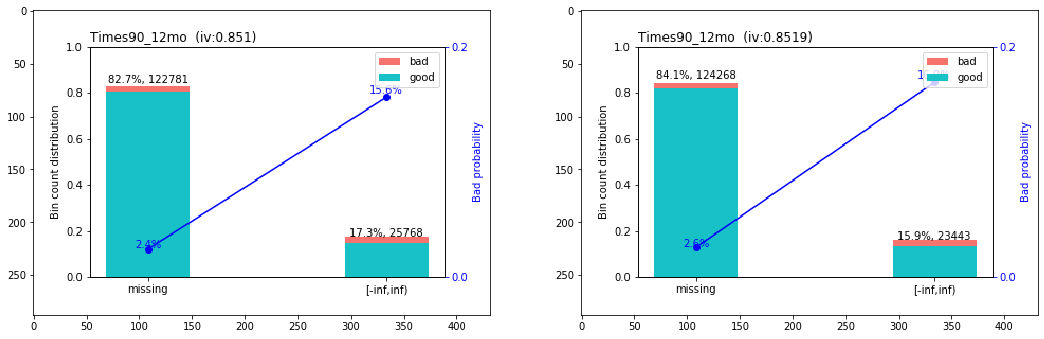

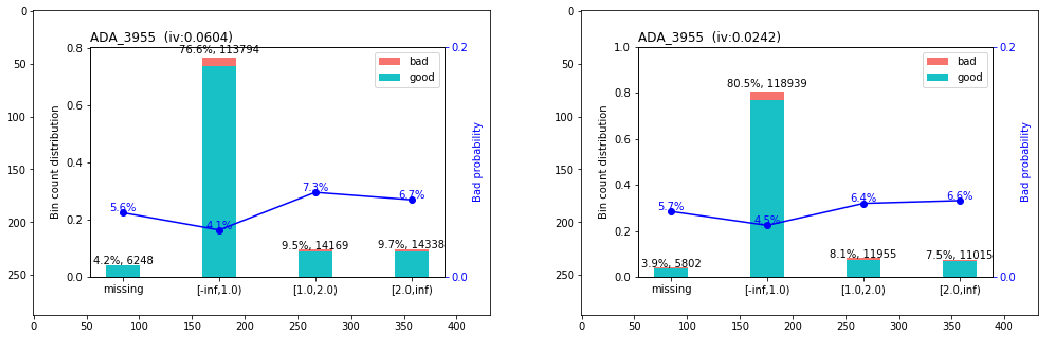

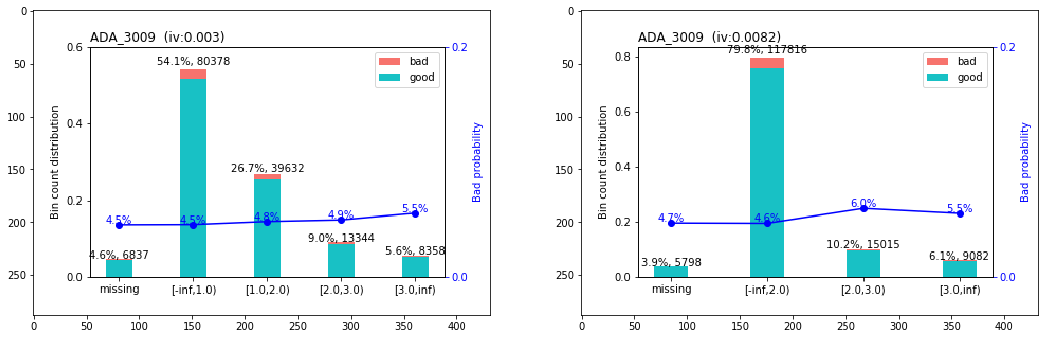

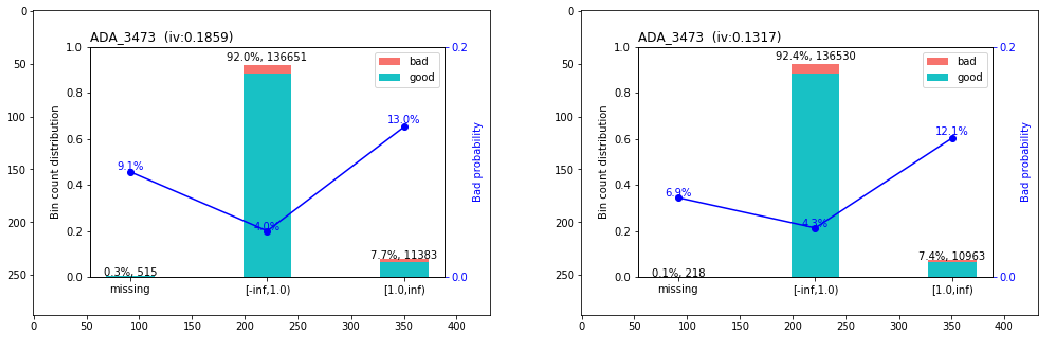

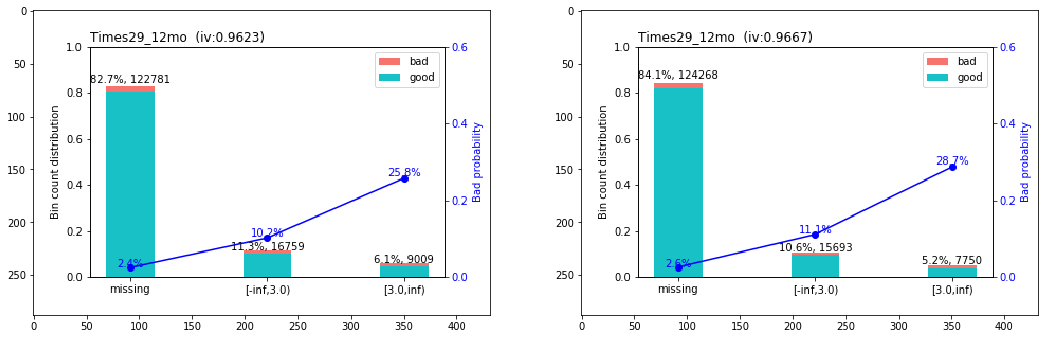

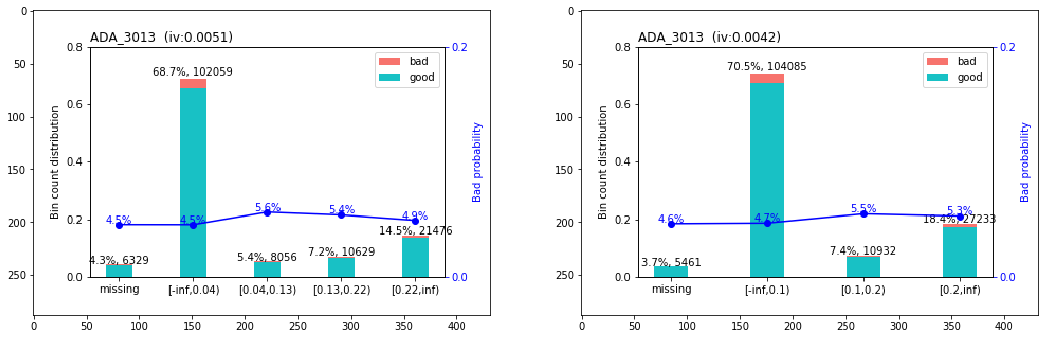

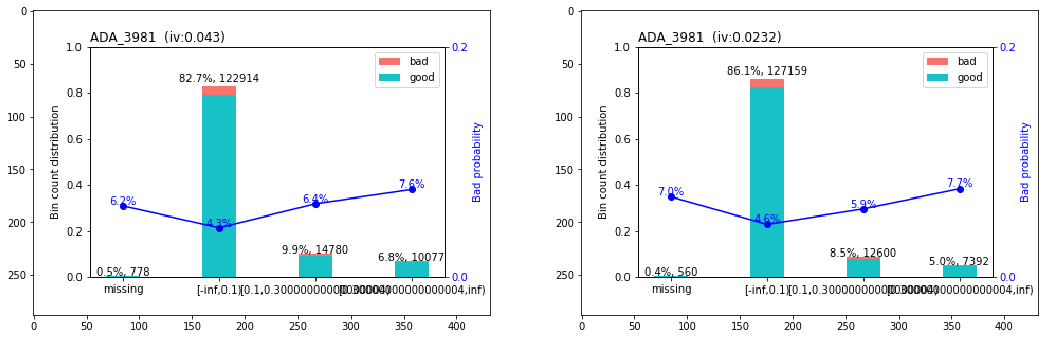

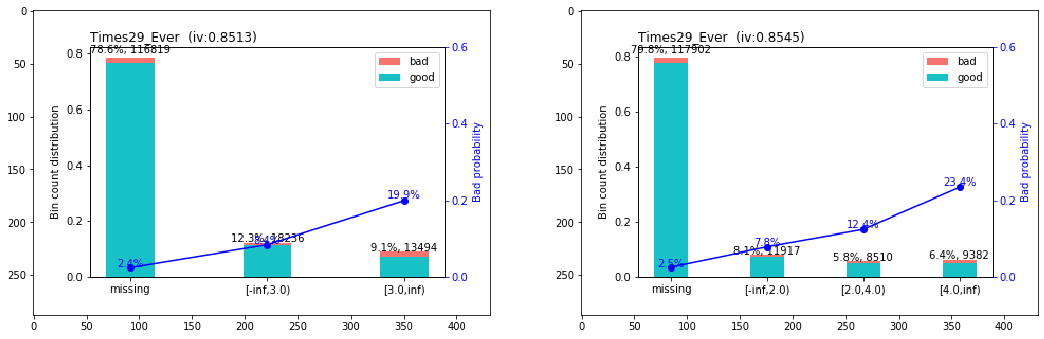

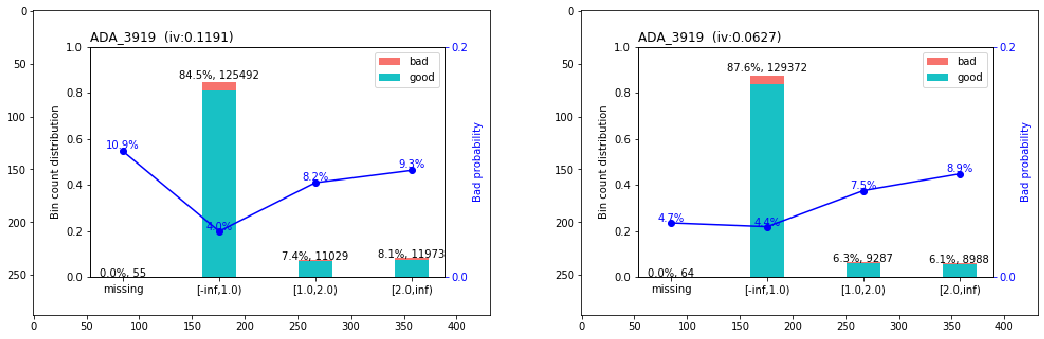

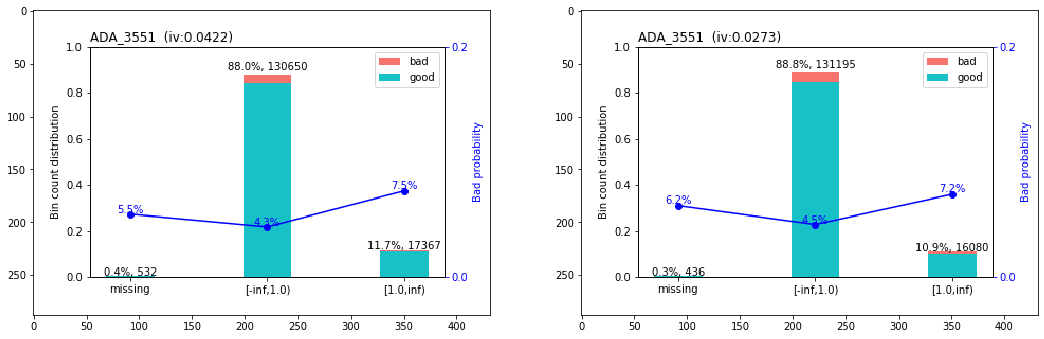

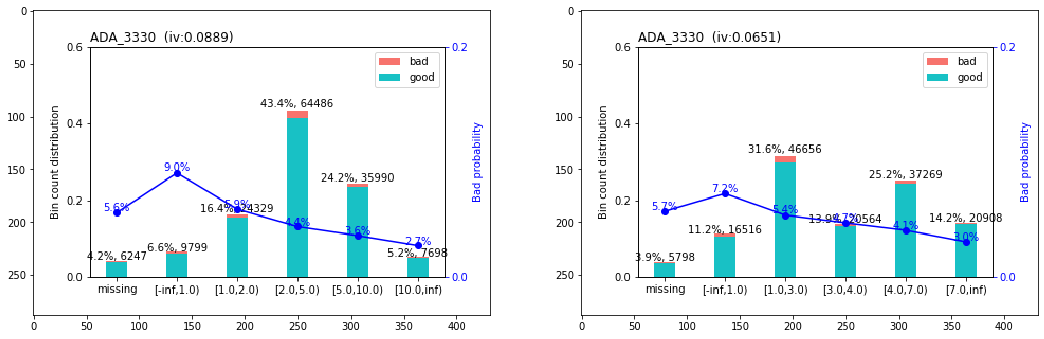

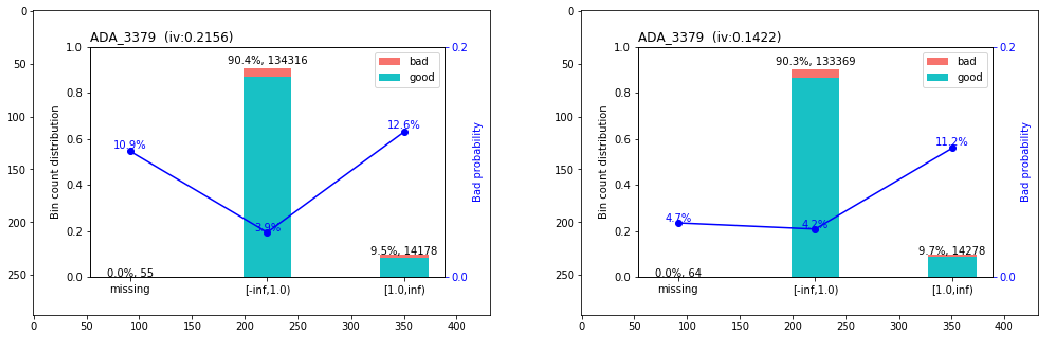

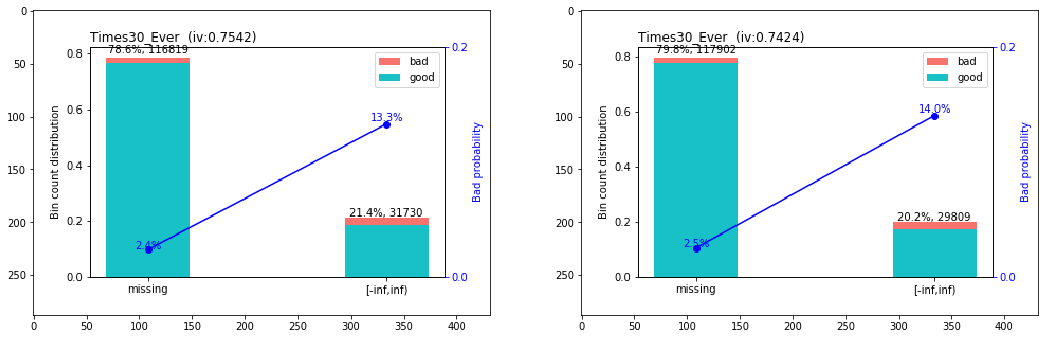

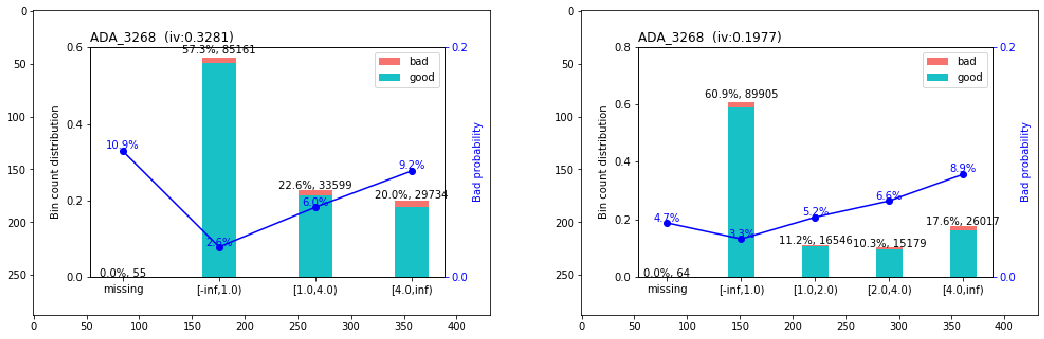

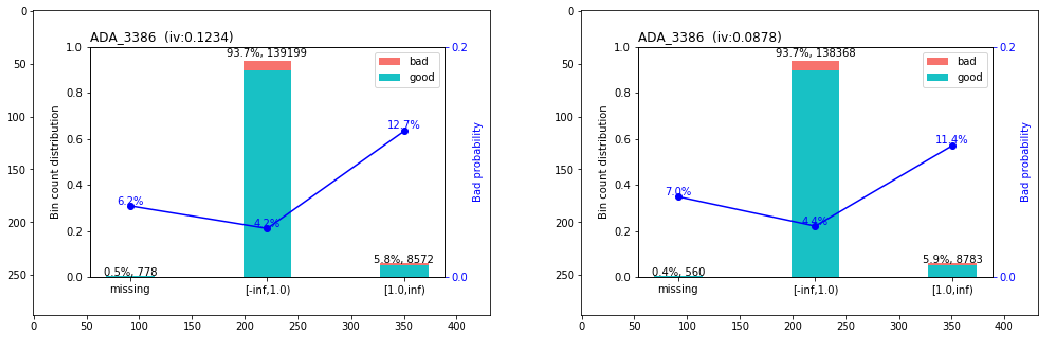

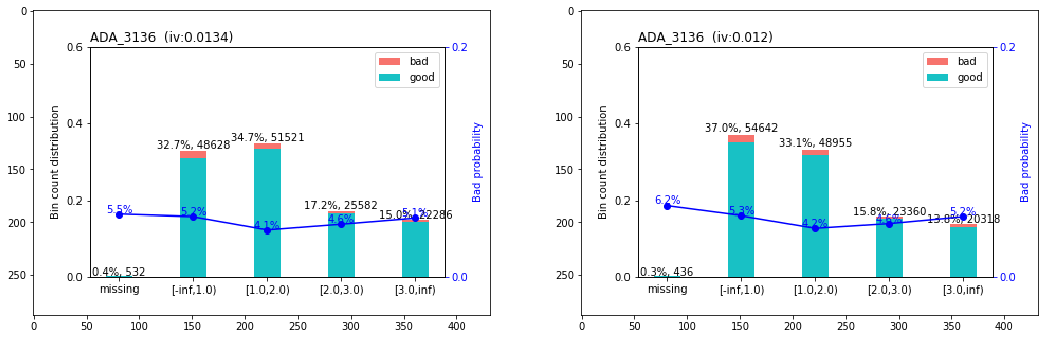

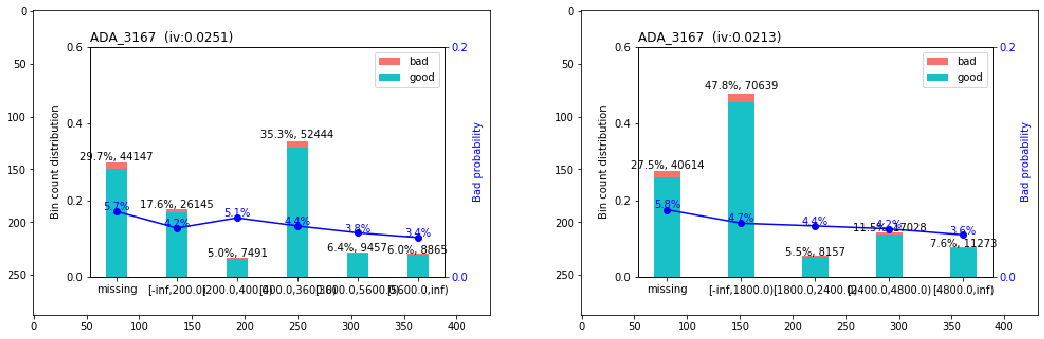

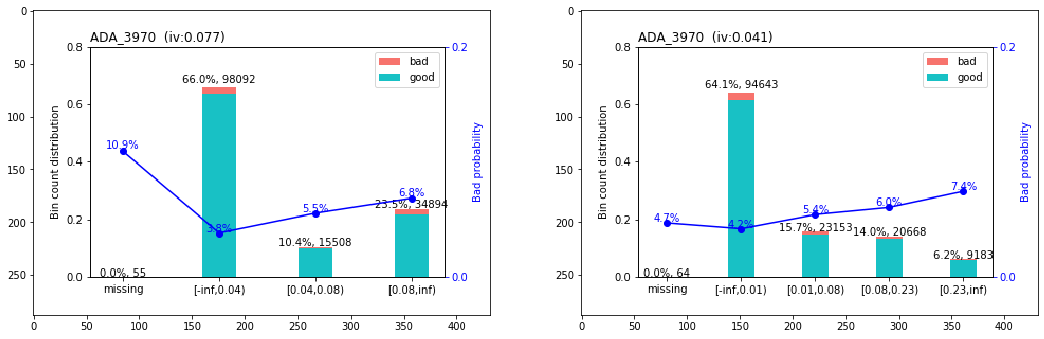

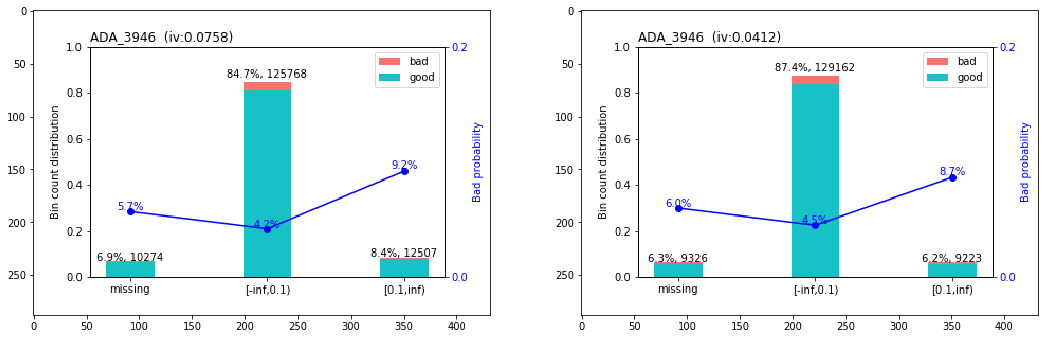

In [20]:
# figure size in inches optional
rcParams['figure.figsize'] = 18 ,15

for key,i in plotlist.items():
    # read images
    img_A = mpimg.imread('/home/ec2-user/SageMaker/propensity_to_pay/slownoappl/char/' + str(key)+ '.png')
    img_B = mpimg.imread('/home/ec2-user/SageMaker/propensity_to_pay/model_monitor/slownoappl_char/'+ str(key)+ '.png')

    # display images
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_A)
    ax[1].imshow(img_B)

In [19]:
ptable1=pd.read_csv('../model_monitor/slowsecure_capfloor.csv')
ptable2=pd.read_csv('../model_monitor/slowunsecure_capfloor.csv')
ptable3=pd.read_csv('../model_monitor/slownoappl_capfloor.csv')

In [20]:
y1=df1.loc[: ,'badflag']
X1=df1.loc[: , df1.columns!='badflag']
y2=df2.loc[: ,'badflag']
X2=df2.loc[: , df2.columns!='badflag']
y3=df3.loc[: ,'badflag']
X3=df3.loc[: , df3.columns!='badflag']

In [42]:

impute_secure(X1, ptable1)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/ec2-user/SageMaker/mymodule/impute_functions.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[col] <= p1, col] = p1
/home/ec2-user/SageMaker/mymodule/impute_functions.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[col] 

In [22]:
impute_unsecure(X2, ptable2)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
impute_noappl(X3, ptable3)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
X1.fillna(0, inplace=True)
X2.fillna(0, inplace=True)
X3.fillna(0, inplace=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
xgb1 = download_model('slowsecure_xgb_model_v2_2')
xgb2 = download_model('slowunsecure_xgb_model_v2_2')
xgb3 = download_model('slownoappl_xgb_model_v2_2')

In [25]:
pred1=xgb1.predict_proba(X1)[:, 1]
pred2=xgb2.predict_proba(X2)[:, 1]
pred3=xgb3.predict_proba(X3)[:, 1]

In [26]:
y_true=pd.concat([y1, y2,y3], sort=False)
y_true.reset_index(drop=True, inplace=True)

In [27]:

y_hat_df1=pd.DataFrame(data=pred1, columns=['Y_hats'], index=X1.index.copy())

y_hat_df2=pd.DataFrame(data=pred2, columns=['Y_hats'], index=X2.index.copy())

y_hat_df3=pd.DataFrame(data=pred3, columns=['Y_hats'], index=X3.index.copy())

In [28]:

y_hat=pd.concat([y_hat_df1, y_hat_df2,y_hat_df3], sort=False)
y_hat.reset_index(drop=True, inplace=True)
y_hat.describe()

Y_hats
count  540956.000000
mean        0.046737
std         0.083896
min         0.000017
25%         0.003717
50%         0.017977
75%         0.045316
max         0.882923

In [29]:

df_out=pd.merge(y_true, y_hat, how='left', left_index=True, right_index=True)
ks_out=ks(data=df_out, target='badflag', prob='Y_hats')

        min_score  max_score  events  nonevents  total event_rate  \
Decile                                                              
1        0.120855   0.882923   12847      41249  54096     23.75%   
2        0.058620   0.120854    4034      50061  54095      7.46%   
3        0.036327   0.058620    2354      51742  54096      4.35%   
4        0.025130   0.036327    1482      52613  54095      2.74%   
5        0.017977   0.025130    1069      53027  54096      1.98%   
6        0.012367   0.017977     823      53271  54094      1.52%   
7        0.006674   0.012367     510      53587  54097      0.94%   
8        0.001481   0.006674     180      53915  54095      0.33%   
9        0.000256   0.001481      26      54070  54096      0.05%   
10       0.000017   0.000256       3      54093  54096      0.01%   

       nonevent_rate % events % nonevents % cum_events % cum_nonevents    KS  
Decile                                                                        
1            

In [30]:

upload_file(ks_out,'slow_xgb_ks.xlsx')


In [31]:
slows_base=pd.read_csv('slowsbaseline_xgb_v2_2.csv')
slows_base.describe()


badflag         Y_hats        target0
count  175648.000000  175648.000000  175648.000000
mean        0.046622       0.047435       0.953378
std         0.210828       0.083658       0.210828
min         0.000000       0.000016       0.000000
25%         0.000000       0.004693       1.000000
50%         0.000000       0.018934       1.000000
75%         0.000000       0.046071       1.000000
max         1.000000       0.857533       1.000000

In [32]:
#calculate PSI for score;
import math
slows_psi_out=psi(slows_base["Y_hats"].tolist(), y_hat["Y_hats"].tolist(), group=10)


   lowercut  uppercut  ben_cnt   ben_pct  comp_cnt  comp_pct  pct_diff  \
0  0.000016  0.000274  17565.0  0.100001   57862.0  0.106962 -0.006961   
1  0.000274  0.002093  17565.0  0.100001   58166.0  0.107524 -0.007523   
2  0.002093  0.008044  17565.0  0.100001   57434.0  0.106171 -0.006170   
3  0.008045  0.013533  17565.0  0.100001   54613.0  0.100956 -0.000955   
4  0.013533  0.018934  17565.0  0.100001   50647.0  0.093625  0.006376   
5  0.018935  0.025949  17565.0  0.100001   50834.0  0.093971  0.006030   
6  0.025950  0.037144  17565.0  0.100001   51969.0  0.096069  0.003932   
7  0.037145  0.059438  17565.0  0.100001   52517.0  0.097082  0.002919   
8  0.059429  0.121407  17564.0  0.099995   53020.0  0.098012  0.001984   
9  0.121429  0.882923  17564.0  0.099995   53868.0  0.099579  0.000416   

   info_odds       psi  
0  -0.067297  0.000468  
1  -0.072537  0.000546  
2  -0.059872  0.000369  
3  -0.009508  0.000009  
4   0.065884  0.000420  
5   0.062199  0.000375  
6   0.0401

In [33]:
upload_file(slows_psi_out,'slows_xgb_psi.xlsx')



In [34]:
!rm slownoappl_xgb_model_v2_2
!rm slowsecure_xgb_model_v2_2
!rm slowunsecure_xgb_model_v2_2

In [35]:
#compile a list of model variables for the pps model
varlist=['MOBVintageUnthread', '__of_days_until_pmt_date', 'Times29_6mo',
       'Times29_12mo', 'Times29_Ever', 'Times60_Ever', 'Times90_Ever',
       'ADA_3368', 'ADA_3863', 'ADA_3842', 'ADA_3117', 'ADA_3547', 'ADA_3854',
       'ADA_3367', 'ADA_3379', 'ADA_3474', 'ADA_3535', 'ADA_3614', 'ADA_3755',
       'ADA_3273', 'ADA_3540', 'ADA_3757', 'ADA_3761', 'ADA_3011', 'ADA_3026',
       'ADA_3580', 'ADA_3208', 'ADA_3235', 'ADA_3347', 'ADA_3366', 'ADA_3612',
       'ADA_3852', 'ADA_3856', 'ADA_3901', 'ADA_3144', 'ADA_3422',
       'Fixed_Income', 'Hourly_Income', 'Auto_Pay_flag','MOBVintageUnthread', '__of_days_until_pmt_date', 'Times29_6mo',
       'Times30_9mo', 'Times29_12mo', 'Times29_Ever', 'Times30_Ever',
       'Times60_Ever', 'Times90_Ever', 'ADA_3217', 'ADA_3239', 'ADA_3370',
       'ADA_3854', 'ADA_3268', 'ADA_3379', 'ADA_3415', 'ADA_3473', 'ADA_3805',
       'ADA_3843', 'ADA_3844', 'ADA_3273', 'ADA_3926', 'ADA_3010', 'ADA_3020',
       'ADA_3024', 'ADA_3348', 'ADA_3373', 'ADA_3841', 'ADA_3208', 'ADA_3386',
       'ADA_3915', 'ADA_3979', 'ADA_3992', 'ADA_3422', 'Fixed_Income',
       'Auto_Pay_flag', 'CreditKumar', 'upb_ratio','MOBVintageThread', '__of_days_until_pmt_date', 'Times29_6mo',
       'Times29_12mo', 'Times30_12mo', 'Times90_12mo', 'Times29_Ever',
       'Times30_Ever', 'ADA_3863', 'ADA_3330', 'ADA_3854', 'ADA_3946',
       'ADA_3955', 'ADA_3973', 'ADA_3135', 'ADA_3192', 'ADA_3268', 'ADA_3379',
       'ADA_3406', 'ADA_3473', 'ADA_3625', 'ADA_3919', 'ADA_3970', 'ADA_3136',
       'ADA_3551', 'ADA_3986', 'ADA_3009', 'ADA_3012', 'ADA_3013', 'ADA_3167',
       'ADA_3276', 'ADA_3335', 'ADA_3208', 'ADA_3386', 'ADA_3981', 'ADA_3987',
       'Auto_Pay_flag','Loan_Type', 'Original_PI_Constant', 'number_of_prior_loans',
       'MOBVintageUnthread', 'MOBVintageThread', 'yrs_on_job_dbl',
       '__of_days_until_pmt_date', 'FICO_migration', 'NumberOfCars',
       'MaxCarValue', 'MincarMile', 'Times30_6mo', 'Times30_9mo',
       'Times29_12mo', 'Times30_Ever', 'Times60_Ever', 'Times90_Ever',
       'ADA_3368', 'ADA_3101', 'ADA_3161', 'ADA_3288', 'ADA_3471', 'ADA_3473',
       'ADA_3474', 'ADA_3535', 'ADA_3759', 'ADA_3804', 'ADA_3805', 'ADA_3950',
       'ADA_3983', 'ADA_3105', 'ADA_3116', 'ADA_3540', 'ADA_3879', 'ADA_3979',
       'ADA_3144', 'Homeowner', 'FPD_n', 'PB', 'Coborrower', 'acflnps_n',
       'state_risk','number_of_prior_loans', 'MOBVintageThread', 'FICO_migration',
       'NumberOfCars', 'MaxCarValue', 'Times29_6mo', 'Times30_6mo',
       'Times60_9mo', 'Times29_Ever', 'Times60_Ever', 'ADA_3117', 'ADA_3417',
       'ADA_3860', 'ADA_3939', 'ADA_3977', 'ADA_3550', 'ADA_3474', 'ADA_3475',
       'ADA_3759', 'ADA_3804', 'ADA_3952', 'ADA_3988', 'ADA_3231', 'ADA_3273',
       'ADA_3540', 'ADA_3868', 'ADA_3880', 'ADA_3926', 'ADA_3195', 'ADA_3931',
       'ADA_3374', 'ADA_3386', 'ADA_3762', 'ADA_3869', 'ADA_3144', 'ADA_3850',
       'state_risk','MOBVintageThread', 'MaxCarYear', 'SumCarValue', 'Times29_6mo',
       'Times30_6mo', 'Times29_Ever', 'Times60_Ever', 'ADA_3236', 'ADA_3217',
       'ADA_3320', 'ADA_3897', 'ADA_3946', 'ADA_3311', 'ADA_3475', 'ADA_3759',
       'ADA_3804', 'ADA_3832', 'ADA_3865', 'ADA_3902', 'ADA_3983', 'ADA_3164',
       'ADA_3273', 'ADA_3761', 'ADA_3891', 'ADA_3928', 'ADA_3959', 'ADA_3991',
       'ADA_3353', 'ADA_3545', 'ADA_3611', 'ADA_3235', 'ADA_3395', 'ADA_3751',
       'ADA_3979', 'ADA_3987', 'ADA_3850']

In [37]:
import pandas as pd
myFinalList = pd.unique(varlist).tolist()
print(myFinalList)

['MOBVintageUnthread', '__of_days_until_pmt_date', 'Times29_6mo', 'Times29_12mo', 'Times29_Ever', 'Times60_Ever', 'Times90_Ever', 'ADA_3368', 'ADA_3863', 'ADA_3842', 'ADA_3117', 'ADA_3547', 'ADA_3854', 'ADA_3367', 'ADA_3379', 'ADA_3474', 'ADA_3535', 'ADA_3614', 'ADA_3755', 'ADA_3273', 'ADA_3540', 'ADA_3757', 'ADA_3761', 'ADA_3011', 'ADA_3026', 'ADA_3580', 'ADA_3208', 'ADA_3235', 'ADA_3347', 'ADA_3366', 'ADA_3612', 'ADA_3852', 'ADA_3856', 'ADA_3901', 'ADA_3144', 'ADA_3422', 'Fixed_Income', 'Hourly_Income', 'Auto_Pay_flag', 'Times30_9mo', 'Times30_Ever', 'ADA_3217', 'ADA_3239', 'ADA_3370', 'ADA_3268', 'ADA_3415', 'ADA_3473', 'ADA_3805', 'ADA_3843', 'ADA_3844', 'ADA_3926', 'ADA_3010', 'ADA_3020', 'ADA_3024', 'ADA_3348', 'ADA_3373', 'ADA_3841', 'ADA_3386', 'ADA_3915', 'ADA_3979', 'ADA_3992', 'CreditKumar', 'upb_ratio', 'MOBVintageThread', 'Times30_12mo', 'Times90_12mo', 'ADA_3330', 'ADA_3946', 'ADA_3955', 'ADA_3973', 'ADA_3135', 'ADA_3192', 'ADA_3406', 'ADA_3625', 'ADA_3919', 'ADA_3970', '

In [38]:
len(myFinalList)

150